In [1]:
import numpy as np
import tqdm
import matplotlib.pyplot as plt
import torch
from torch.utils import data
from sklearn.datasets import make_moons
from sklearn.metrics import confusion_matrix, f1_score

from model import get_model, save_checkpoint, load_checkpoint
from dataset import Dataset

In [2]:
reload_work = False

# Data generation

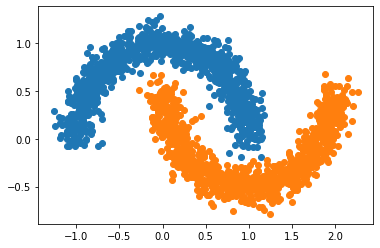

In [3]:
if not reload_work:
    X, y = make_moons(n_samples=2000, noise=0.1)
    np.save('X.npy', X)
    np.save('y.npy', y)
    plt.scatter(X[y==0,0], X[y==0,1])
    plt.scatter(X[y==1,0], X[y==1,1])

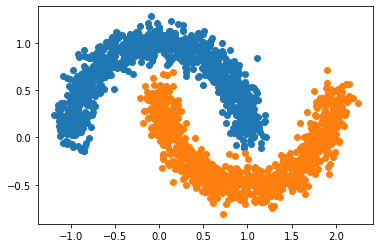

In [3]:
if reload_work:
    X = np.load('X.npy')
    y = np.load('y.npy')
    plt.scatter(X[y==0,0], X[y==0,1])
    plt.scatter(X[y==1,0], X[y==1,1])

## Data preparation for training

In [3]:
if not reload_work:
    idx = np.arange(y.shape[0])
    seen_idx = np.random.choice(idx[y==0], size=10)
    unseen_idx = np.append(seen_idx, np.random.choice(idx[y==1], size=10))
    np.save('seen_idx.npy', seen_idx)
    np.save('unseen_idx.npy', unseen_idx)
    unseen_idx = set(list(idx)) - set(list(seen_idx))
    unseen_idx = np.asarray(list(unseen_idx))

    seen = Dataset(X[seen_idx], y[seen_idx].reshape([-1, 1]))
    unseen = Dataset(X[unseen_idx], y[unseen_idx].reshape([-1, 1]))

    seen_set = data.DataLoader(seen, batch_size=6, shuffle=True)
    unseen_set = data.DataLoader(unseen, batch_size=35, shuffle=True)

In [4]:
if reload_work:
    seen_idx = np.load('seen_idx.npy')
    unseen_idx = np.load('unseen_idx.npy')
    seen = Dataset(X[seen_idx], y[seen_idx].reshape([-1, 1]))
    unseen = Dataset(X[unseen_idx], y[unseen_idx].reshape([-1, 1]))

    seen_set = data.DataLoader(seen, batch_size=6, shuffle=True)
    unseen_set = data.DataLoader(unseen, batch_size=35, shuffle=True)

# Supervised training

In [4]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
net, loss, sgd = get_model(device)

/home/ilham/Documents/python/telkom/model.py:38: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  nn.init.uniform(m.weight, a=-0.1, b=0.1)


In [5]:
ls_loss = []
epoch = 1000
cur_f1 = -1
for e in range(epoch):
    prog_bar = tqdm.tqdm(enumerate(seen_set))
    for step, (X_seen, y_seen) in prog_bar:
        net.train()

        X_seen = X_seen.to(device).float()
        y_seen = y_seen.to(device).float()

        y_pred = net(X_seen)

        bce_loss = loss(y_pred, y_seen)
        sgd.zero_grad()
        bce_loss.backward()
        sgd.step()
        ls_loss.append(bce_loss.detach().numpy())
    
    net.eval()
    y_pred = net(torch.tensor(X).to(device).float())
    y_pred_np = y_pred.detach().numpy()
    tn, fp, fn, tp = confusion_matrix(y, y_pred_np > 0.5).ravel()
    f1 = f1_score(y, (y_pred_np > 0.5))
    if f1 > cur_f1:
        cur_f1 = f1
        save_checkpoint(net, sgd, 'model/supervised', e, f1)

    print(f'{e} tp {tp}, fp {fp}, tn {tn}, fn {fn}')

4it [00:00, 780.77it/s]


Saved checkpoint: model/supervised/checkpoint_epoch000000000_f1-0.6666666666666666.pth
0 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 544.70it/s]


1 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 393.92it/s]


2 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 310.99it/s]


3 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 428.87it/s]


4 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 831.38it/s]


5 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 752.27it/s]


6 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 734.23it/s]


7 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 797.78it/s]


8 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 717.74it/s]


9 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 447.91it/s]


10 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 711.23it/s]


11 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 1007.40it/s]


12 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 745.32it/s]


13 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 592.98it/s]


14 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 569.26it/s]


15 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 443.64it/s]


16 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 463.61it/s]


17 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 882.59it/s]

18 tp 0, fp 0, tn 1000, fn 1000



4it [00:00, 975.14it/s]


19 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 824.19it/s]


20 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 902.34it/s]


21 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 888.91it/s]


22 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 651.39it/s]


23 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 524.58it/s]


24 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 542.95it/s]


25 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 736.81it/s]


26 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 610.90it/s]


27 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 629.52it/s]


28 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 798.38it/s]


29 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 692.50it/s]


30 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 302.72it/s]


31 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 946.53it/s]


32 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 958.92it/s]


33 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 550.74it/s]


34 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 862.54it/s]


35 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 732.31it/s]


36 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 472.17it/s]


37 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 416.94it/s]


38 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 556.40it/s]


39 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 530.57it/s]


40 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 431.16it/s]


41 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 975.87it/s]


42 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 1012.20it/s]


43 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 788.51it/s]


44 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 636.85it/s]


45 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 550.02it/s]


46 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 484.71it/s]


47 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 538.47it/s]


48 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 565.61it/s]


49 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 471.83it/s]


50 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 545.96it/s]


51 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 527.20it/s]


52 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 795.39it/s]


53 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 548.80it/s]

54 tp 0, fp 0, tn 1000, fn 1000



4it [00:00, 647.84it/s]


55 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 582.28it/s]


56 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 667.51it/s]


57 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 561.69it/s]


58 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 711.32it/s]


59 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 597.10it/s]


60 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 864.63it/s]


61 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 1181.08it/s]


62 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 770.66it/s]


63 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 716.15it/s]


64 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 592.75it/s]


65 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 594.68it/s]


66 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 574.40it/s]


67 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 558.46it/s]


68 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 636.30it/s]

69 tp 0, fp 0, tn 1000, fn 1000

4it [00:00, 615.54it/s]


70 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 891.36it/s]


71 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 674.03it/s]


72 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 1166.14it/s]


73 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 529.48it/s]


74 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 787.40it/s]


75 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 651.31it/s]


76 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 1203.19it/s]


77 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 393.53it/s]


78 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 266.72it/s]


79 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 498.43it/s]


80 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 917.69it/s]


81 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 779.18it/s]


82 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 584.45it/s]


83 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 1016.80it/s]


84 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 501.70it/s]


85 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 911.66it/s]


86 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 530.84it/s]


87 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 904.38it/s]


88 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 924.72it/s]


89 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 602.98it/s]


90 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 879.72it/s]


91 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 995.62it/s]


92 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 612.78it/s]


93 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 966.10it/s]


94 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 964.37it/s]


95 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 606.55it/s]


96 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 646.45it/s]


97 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 804.39it/s]


98 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 913.39it/s]


99 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 915.74it/s]


100 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 636.97it/s]


101 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 887.68it/s]


102 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 552.08it/s]


103 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 547.11it/s]


104 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 586.00it/s]


105 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 1039.48it/s]


106 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 590.77it/s]


107 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 868.52it/s]

108 tp 1000, fp 1000, tn 0, fn 0



4it [00:00, 681.42it/s]


109 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 738.86it/s]


110 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 827.69it/s]


111 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 808.11it/s]


112 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 774.89it/s]


113 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 880.23it/s]


114 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 540.61it/s]


115 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 576.62it/s]


116 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 506.28it/s]


117 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 567.70it/s]


118 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 600.69it/s]


119 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 701.04it/s]


120 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 783.03it/s]


121 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 725.75it/s]


122 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 802.05it/s]


123 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 708.17it/s]


124 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 932.43it/s]


125 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 639.42it/s]


126 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 792.99it/s]


127 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 845.07it/s]


128 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 687.53it/s]


129 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 346.41it/s]


130 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 619.45it/s]


131 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 683.25it/s]


132 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 1119.53it/s]


133 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 508.55it/s]


134 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 401.16it/s]


135 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 579.58it/s]


136 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 587.19it/s]


137 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 526.62it/s]


138 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 571.37it/s]


139 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 737.20it/s]


140 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 705.90it/s]


141 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 556.70it/s]


142 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 800.59it/s]


143 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 536.54it/s]


144 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 486.23it/s]


145 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 610.06it/s]


146 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 681.20it/s]


147 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 622.95it/s]


148 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 603.80it/s]


149 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 847.51it/s]


150 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 928.41it/s]


151 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 618.74it/s]


152 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 616.58it/s]


153 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 829.53it/s]


154 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 899.39it/s]


155 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 686.07it/s]


156 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 615.54it/s]

157 tp 1000, fp 1000, tn 0, fn 0



4it [00:00, 340.07it/s]


158 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 669.75it/s]


159 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 440.10it/s]


160 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 281.79it/s]


161 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 550.83it/s]


162 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 380.87it/s]


163 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 565.59it/s]


164 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 371.54it/s]


165 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 486.31it/s]


166 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 766.89it/s]


167 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 907.27it/s]


168 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 796.15it/s]


169 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 565.08it/s]

170 tp 1000, fp 1000, tn 0, fn 0

4it [00:00, 637.36it/s]


171 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 1029.15it/s]


172 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 992.91it/s]


173 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 760.39it/s]


174 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 818.92it/s]


175 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 565.94it/s]


176 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 868.12it/s]


177 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 906.83it/s]


178 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 599.81it/s]


179 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 172.25it/s]


180 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 436.40it/s]


181 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 795.81it/s]


182 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 548.63it/s]


183 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 846.31it/s]


184 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 957.22it/s]


185 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 586.10it/s]


186 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 1043.81it/s]


187 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 494.89it/s]


188 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 542.86it/s]


189 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 562.97it/s]


190 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 608.91it/s]


191 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 724.22it/s]


192 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 760.63it/s]


193 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 436.38it/s]


194 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 487.74it/s]


195 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 441.41it/s]


196 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 860.19it/s]


197 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 1139.37it/s]


198 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 568.35it/s]


199 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 637.99it/s]


200 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 779.68it/s]


201 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 542.46it/s]


202 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 751.53it/s]


203 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 696.87it/s]


204 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 506.13it/s]


205 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 901.56it/s]


206 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 965.43it/s]


207 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 642.36it/s]


208 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 663.47it/s]


209 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 741.63it/s]


210 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 992.38it/s]


211 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 884.27it/s]


212 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 533.63it/s]


213 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 924.11it/s]

214 tp 0, fp 0, tn 1000, fn 1000

4it [00:00, 942.86it/s]


215 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 539.62it/s]


216 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 976.73it/s]


217 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 1083.59it/s]


218 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 984.12it/s]


219 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 731.64it/s]


220 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 484.41it/s]


221 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 1341.96it/s]


222 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 442.47it/s]


223 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 384.13it/s]


224 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 579.24it/s]


225 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 567.58it/s]


226 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 465.35it/s]


227 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 437.41it/s]


228 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 589.23it/s]


229 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 639.96it/s]


230 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 671.25it/s]


231 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 607.85it/s]


232 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 620.16it/s]


233 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 846.95it/s]


234 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 831.58it/s]


235 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 637.87it/s]


236 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 517.54it/s]


237 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 636.08it/s]


238 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 636.42it/s]


239 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 876.96it/s]


240 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 654.52it/s]


241 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 590.06it/s]


242 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 745.16it/s]


243 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 742.06it/s]


244 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 826.95it/s]


245 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 874.63it/s]


246 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 685.46it/s]


247 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 723.59it/s]


248 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 1009.10it/s]


249 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 755.63it/s]


250 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 948.08it/s]


251 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 929.49it/s]


252 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 678.09it/s]


253 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 635.02it/s]


254 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 765.94it/s]


255 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 701.71it/s]


256 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 674.03it/s]


257 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 554.97it/s]


258 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 462.22it/s]


259 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 668.47it/s]


260 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 742.26it/s]


261 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 898.28it/s]


262 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 670.98it/s]


263 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 693.27it/s]


264 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 545.02it/s]


265 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 596.44it/s]


266 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 854.67it/s]


267 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 966.49it/s]


268 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 920.66it/s]


269 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 875.14it/s]


270 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 758.74it/s]


271 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 691.22it/s]


272 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 514.29it/s]


273 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 581.61it/s]


274 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 656.00it/s]


275 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 632.77it/s]


276 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 457.91it/s]


277 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 601.87it/s]


278 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 767.70it/s]


279 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 1013.30it/s]


280 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 876.92it/s]


281 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 526.01it/s]


282 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 759.36it/s]


283 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 856.77it/s]


284 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 695.31it/s]


285 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 552.70it/s]


286 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 588.39it/s]


287 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 506.56it/s]


288 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 659.53it/s]


289 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 454.48it/s]


290 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 454.46it/s]


291 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 559.39it/s]


292 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 433.13it/s]


293 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 536.73it/s]


294 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 729.86it/s]


295 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 424.37it/s]


296 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 467.41it/s]


297 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 561.24it/s]


298 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 410.34it/s]


299 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 565.59it/s]


300 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 543.27it/s]


301 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 620.48it/s]


302 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 657.39it/s]


303 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 636.59it/s]


304 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 534.32it/s]

305 tp 0, fp 0, tn 1000, fn 1000

4it [00:00, 598.46it/s]


306 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 189.16it/s]


307 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 738.47it/s]


308 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 485.27it/s]


309 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 453.60it/s]


310 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 310.67it/s]


311 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 860.59it/s]


312 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 993.62it/s]


313 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 811.32it/s]


314 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 839.53it/s]

315 tp 0, fp 0, tn 1000, fn 1000



4it [00:00, 449.66it/s]


316 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 615.32it/s]


317 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 581.69it/s]


318 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 476.99it/s]


319 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 667.06it/s]


320 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 651.31it/s]


321 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 585.43it/s]


322 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 602.74it/s]


323 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 302.84it/s]


324 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 302.58it/s]


325 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 552.35it/s]


326 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 591.85it/s]


327 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 563.01it/s]


328 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 685.76it/s]


329 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 516.79it/s]


330 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 393.14it/s]


331 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 787.81it/s]


332 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 1010.92it/s]


333 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 364.07it/s]


334 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 439.87it/s]


335 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 224.54it/s]


336 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 393.52it/s]


337 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 293.69it/s]


338 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 770.59it/s]


339 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 456.27it/s]


340 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 339.22it/s]


341 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 296.07it/s]


342 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 496.16it/s]


343 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 873.04it/s]


344 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 557.83it/s]


345 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 646.80it/s]


346 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 875.96it/s]


347 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 408.74it/s]


348 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 375.88it/s]


349 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 417.70it/s]


350 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 489.72it/s]


351 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 224.87it/s]


352 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 762.77it/s]


353 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 386.38it/s]


354 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 1023.13it/s]


355 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 277.60it/s]


356 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 668.79it/s]


357 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 754.20it/s]


358 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 749.08it/s]


359 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 502.67it/s]


360 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 681.72it/s]


361 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 419.11it/s]

362 tp 1000, fp 1000, tn 0, fn 0

4it [00:00, 845.50it/s]


363 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 990.80it/s]


364 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 700.80it/s]


365 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 481.18it/s]


366 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 666.93it/s]

367 tp 0, fp 0, tn 1000, fn 1000

4it [00:00, 834.40it/s]


368 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 812.18it/s]


369 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 969.33it/s]


370 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 1041.87it/s]


371 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 591.46it/s]


372 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 605.57it/s]


373 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 553.87it/s]


374 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 443.21it/s]


375 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 487.26it/s]


376 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 478.45it/s]


377 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 772.25it/s]


378 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 502.03it/s]


379 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 442.75it/s]


380 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 458.85it/s]


381 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 409.68it/s]


382 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 569.68it/s]


383 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 334.53it/s]


384 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 473.26it/s]


385 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 916.54it/s]


386 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 894.74it/s]


387 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 761.01it/s]


388 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 735.04it/s]


389 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 610.50it/s]


390 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 621.29it/s]


391 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 574.29it/s]


392 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 894.69it/s]


393 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 480.65it/s]


394 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 661.17it/s]


395 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 1085.55it/s]


396 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 808.74it/s]


397 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 711.92it/s]


398 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 938.27it/s]


399 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 587.48it/s]


400 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 408.55it/s]


401 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 939.01it/s]


402 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 886.56it/s]


403 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 863.20it/s]


404 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 556.44it/s]


405 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 908.01it/s]


406 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 676.31it/s]


407 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 708.17it/s]


408 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 636.51it/s]


409 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 953.03it/s]


410 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 372.03it/s]


411 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 632.79it/s]


412 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 617.88it/s]


413 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 411.88it/s]


414 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 342.22it/s]


415 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 516.78it/s]


416 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 284.92it/s]


417 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 511.78it/s]


418 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 604.04it/s]


419 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 615.18it/s]


420 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 502.90it/s]


421 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 767.80it/s]


422 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 322.30it/s]

423 tp 0, fp 0, tn 1000, fn 1000



4it [00:00, 698.93it/s]


424 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 672.30it/s]


425 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 948.08it/s]


426 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 398.05it/s]


427 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 684.45it/s]


428 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 929.69it/s]


429 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 580.25it/s]


430 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 528.20it/s]


431 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 557.70it/s]


432 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 334.20it/s]


433 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 668.57it/s]


434 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 575.23it/s]


435 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 454.37it/s]


436 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 415.77it/s]


437 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 1017.11it/s]


438 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 800.13it/s]


439 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 588.28it/s]


440 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 951.31it/s]


441 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 644.43it/s]


442 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 406.79it/s]


443 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 392.53it/s]


444 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 682.53it/s]


445 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 378.25it/s]


446 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 365.78it/s]


447 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 520.24it/s]


448 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 899.97it/s]


449 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 844.01it/s]


450 tp 358, fp 0, tn 1000, fn 642


4it [00:00, 405.90it/s]


451 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 478.45it/s]


452 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 402.93it/s]


453 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 762.01it/s]


454 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 795.32it/s]


455 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 911.16it/s]


456 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 640.43it/s]


457 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 582.44it/s]


458 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 620.21it/s]


459 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 547.34it/s]


Saved checkpoint: model/supervised/checkpoint_epoch000000460_f1-0.7867820613690009.pth
460 tp 1000, fp 542, tn 458, fn 0


4it [00:00, 740.88it/s]


461 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 828.83it/s]


Saved checkpoint: model/supervised/checkpoint_epoch000000462_f1-0.8051529790660226.pth
462 tp 1000, fp 484, tn 516, fn 0


4it [00:00, 489.97it/s]


463 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 765.03it/s]


464 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 477.11it/s]


465 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 844.48it/s]


466 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 251.12it/s]


467 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 314.86it/s]


468 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 534.80it/s]


469 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 747.81it/s]


470 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 803.24it/s]


471 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 399.11it/s]


472 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 659.95it/s]


473 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 544.75it/s]


474 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 411.96it/s]


475 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 475.98it/s]


476 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 443.96it/s]


477 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 349.17it/s]


478 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 421.95it/s]


479 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 750.56it/s]


480 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 407.24it/s]


481 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 683.92it/s]


482 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 625.41it/s]


483 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 715.14it/s]


484 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 799.56it/s]


485 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 768.86it/s]


486 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 815.02it/s]


487 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 423.21it/s]


488 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 701.39it/s]


489 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 367.57it/s]


490 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 328.55it/s]


491 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 433.35it/s]


492 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 305.56it/s]


493 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 390.91it/s]


494 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 503.35it/s]


495 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 401.74it/s]


496 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 389.92it/s]


497 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 552.48it/s]


498 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 516.95it/s]


499 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 794.00it/s]


500 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 385.76it/s]


501 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 347.94it/s]


502 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 630.13it/s]


503 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 353.00it/s]


504 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 386.93it/s]


505 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 532.15it/s]


506 tp 1000, fp 966, tn 34, fn 0


4it [00:00, 355.61it/s]


507 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 515.22it/s]


508 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 392.73it/s]


509 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 497.81it/s]


510 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 727.10it/s]


511 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 430.57it/s]


512 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 599.44it/s]


513 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 294.52it/s]


514 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 583.76it/s]


515 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 685.32it/s]

516 tp 1000, fp 1000, tn 0, fn 0

4it [00:00, 594.39it/s]


517 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 373.66it/s]


518 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 660.57it/s]


519 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 759.01it/s]


520 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 410.52it/s]


521 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 333.75it/s]


522 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 771.19it/s]


523 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 619.06it/s]

524 tp 0, fp 0, tn 1000, fn 1000



4it [00:00, 253.65it/s]


525 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 666.74it/s]


526 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 891.55it/s]


527 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 507.95it/s]


528 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 880.74it/s]


529 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 367.70it/s]


530 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 449.90it/s]


531 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 722.28it/s]


532 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 492.90it/s]


533 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 1094.62it/s]


534 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 398.16it/s]


535 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 618.40it/s]

536 tp 0, fp 0, tn 1000, fn 1000

4it [00:00, 385.58it/s]


537 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 1007.40it/s]


538 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 405.05it/s]


539 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 837.48it/s]


540 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 474.48it/s]


541 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 844.65it/s]


542 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 981.47it/s]

543 tp 0, fp 0, tn 1000, fn 1000

4it [00:00, 512.59it/s]


544 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 1081.98it/s]


545 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 774.46it/s]


546 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 276.28it/s]


547 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 267.06it/s]


548 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 628.17it/s]


549 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 614.46it/s]


550 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 637.04it/s]


551 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 541.15it/s]


552 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 504.99it/s]


553 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 907.76it/s]


554 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 477.14it/s]


555 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 889.71it/s]


556 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 489.90it/s]


557 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 470.81it/s]


558 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 453.87it/s]


559 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 833.90it/s]


560 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 939.01it/s]


561 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 764.20it/s]


562 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 469.81it/s]


563 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 603.95it/s]


564 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 643.00it/s]

565 tp 1000, fp 1000, tn 0, fn 0

4it [00:00, 792.99it/s]


566 tp 1000, fp 837, tn 163, fn 0


4it [00:00, 905.31it/s]


567 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 1062.39it/s]


568 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 562.14it/s]


569 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 796.00it/s]


570 tp 92, fp 0, tn 1000, fn 908


4it [00:00, 868.97it/s]


571 tp 686, fp 137, tn 863, fn 314


4it [00:00, 620.94it/s]

572 tp 294, fp 0, tn 1000, fn 706



4it [00:00, 394.93it/s]


573 tp 432, fp 0, tn 1000, fn 568


4it [00:00, 391.10it/s]


574 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 630.20it/s]


575 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 284.61it/s]


576 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 657.54it/s]


577 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 774.54it/s]


578 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 622.12it/s]


579 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 526.08it/s]


580 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 634.01it/s]


581 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 717.04it/s]


582 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 605.83it/s]


583 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 529.99it/s]


584 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 449.17it/s]


585 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 698.79it/s]


586 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 456.47it/s]


587 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 494.98it/s]


588 tp 595, fp 22, tn 978, fn 405


4it [00:00, 535.14it/s]


589 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 336.08it/s]


590 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 376.22it/s]


591 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 489.85it/s]


592 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 597.37it/s]


593 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 554.51it/s]


594 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 532.10it/s]


595 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 674.41it/s]


596 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 401.60it/s]


597 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 941.54it/s]


598 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 475.52it/s]


599 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 842.78it/s]


600 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 880.05it/s]


601 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 994.03it/s]


602 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 887.03it/s]


603 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 676.99it/s]


604 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 457.79it/s]


605 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 911.21it/s]


606 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 391.87it/s]


607 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 895.12it/s]


608 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 507.75it/s]


609 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 962.55it/s]


610 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 525.44it/s]


611 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 843.12it/s]


612 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 703.42it/s]


613 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 953.68it/s]


614 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 741.83it/s]


615 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 808.93it/s]


616 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 908.50it/s]


617 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 452.29it/s]


618 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 1022.19it/s]


619 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 858.65it/s]


620 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 868.34it/s]

621 tp 0, fp 0, tn 1000, fn 1000

4it [00:00, 969.89it/s]


622 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 461.04it/s]

623 tp 0, fp 0, tn 1000, fn 1000

4it [00:00, 1033.84it/s]


624 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 815.62it/s]


625 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 838.90it/s]


626 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 802.47it/s]


627 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 812.42it/s]


628 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 421.06it/s]


629 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 692.27it/s]


630 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 676.01it/s]


631 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 843.50it/s]


632 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 365.91it/s]


633 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 291.30it/s]


634 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 559.35it/s]


635 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 715.84it/s]


636 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 700.89it/s]

637 tp 1000, fp 1000, tn 0, fn 0

4it [00:00, 849.09it/s]


638 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 797.97it/s]


639 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 634.08it/s]


640 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 759.29it/s]


641 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 799.33it/s]


642 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 419.84it/s]


643 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 747.35it/s]


644 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 877.65it/s]


645 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 540.09it/s]


646 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 855.37it/s]


647 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 858.35it/s]


648 tp 1000, fp 717, tn 283, fn 0


4it [00:00, 1073.06it/s]


649 tp 1000, fp 672, tn 328, fn 0


4it [00:00, 910.67it/s]


650 tp 819, fp 265, tn 735, fn 181


4it [00:00, 733.01it/s]


651 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 796.26it/s]


652 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 752.65it/s]


653 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 840.42it/s]


654 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 863.07it/s]


655 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 883.99it/s]


656 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 797.43it/s]


657 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 420.92it/s]


658 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 281.63it/s]


659 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 762.57it/s]


Saved checkpoint: model/supervised/checkpoint_epoch000000660_f1-0.8202802967848309.pth
660 tp 995, fp 431, tn 569, fn 5


4it [00:00, 443.44it/s]


661 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 648.62it/s]


662 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 361.75it/s]


663 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 709.79it/s]


664 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 861.74it/s]


665 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 709.82it/s]


666 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 858.65it/s]


667 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 356.99it/s]


668 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 489.69it/s]


669 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 660.81it/s]


670 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 381.51it/s]


671 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 365.29it/s]


672 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 508.82it/s]


673 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 684.90it/s]


674 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 617.29it/s]


675 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 821.57it/s]


676 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 357.52it/s]


677 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 370.09it/s]

678 tp 1000, fp 1000, tn 0, fn 0

4it [00:00, 713.95it/s]


679 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 689.71it/s]


680 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 446.13it/s]


681 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 569.63it/s]


682 tp 1000, fp 570, tn 430, fn 0


4it [00:00, 739.83it/s]


683 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 952.39it/s]


684 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 579.28it/s]


685 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 993.79it/s]


686 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 706.41it/s]


687 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 806.44it/s]


688 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 776.54it/s]


689 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 469.61it/s]

690 tp 0, fp 0, tn 1000, fn 1000



4it [00:00, 482.34it/s]


691 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 727.17it/s]


692 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 427.53it/s]


693 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 437.45it/s]


694 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 750.59it/s]

695 tp 0, fp 0, tn 1000, fn 1000

4it [00:00, 424.28it/s]


696 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 493.29it/s]


697 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 772.25it/s]


698 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 822.78it/s]


699 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 393.00it/s]


700 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 800.40it/s]


701 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 517.78it/s]


702 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 535.79it/s]


703 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 867.04it/s]


704 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 849.05it/s]


705 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 807.49it/s]


706 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 395.66it/s]


707 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 726.19it/s]


708 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 542.60it/s]


709 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 711.47it/s]


710 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 465.41it/s]


711 tp 998, fp 449, tn 551, fn 2


4it [00:00, 900.45it/s]


712 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 548.31it/s]


713 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 862.45it/s]


714 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 709.73it/s]


715 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 893.83it/s]


716 tp 1000, fp 791, tn 209, fn 0


4it [00:00, 810.22it/s]


717 tp 1000, fp 520, tn 480, fn 0


4it [00:00, 579.46it/s]


Saved checkpoint: model/supervised/checkpoint_epoch000000718_f1-0.8213841690841277.pth
718 tp 991, fp 422, tn 578, fn 9


4it [00:00, 375.40it/s]


719 tp 1000, fp 465, tn 535, fn 0


4it [00:00, 366.20it/s]


720 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 342.75it/s]


721 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 550.00it/s]


722 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 429.43it/s]


723 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 317.82it/s]

724 tp 0, fp 0, tn 1000, fn 1000



4it [00:00, 806.48it/s]


725 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 820.64it/s]


726 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 643.52it/s]


727 tp 715, fp 158, tn 842, fn 285


4it [00:00, 848.92it/s]


728 tp 682, fp 126, tn 874, fn 318


4it [00:00, 462.51it/s]


729 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 887.31it/s]


730 tp 1000, fp 592, tn 408, fn 0


4it [00:00, 848.92it/s]


731 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 613.22it/s]


732 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 835.85it/s]


733 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 542.34it/s]


734 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 941.48it/s]


735 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 904.77it/s]


736 tp 1000, fp 997, tn 3, fn 0


4it [00:00, 859.80it/s]


737 tp 1000, fp 802, tn 198, fn 0


4it [00:00, 808.27it/s]


738 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 798.99it/s]


739 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 458.03it/s]

740 tp 0, fp 0, tn 1000, fn 1000



4it [00:00, 948.88it/s]


741 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 391.99it/s]


742 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 927.94it/s]


743 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 924.11it/s]


744 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 474.54it/s]


745 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 990.74it/s]


746 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 820.72it/s]


747 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 915.69it/s]


748 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 1020.08it/s]


749 tp 108, fp 0, tn 1000, fn 892


4it [00:00, 1005.77it/s]


750 tp 1000, fp 886, tn 114, fn 0


4it [00:00, 839.70it/s]


Saved checkpoint: model/supervised/checkpoint_epoch000000751_f1-0.821963394342762.pth
751 tp 988, fp 416, tn 584, fn 12


4it [00:00, 1029.21it/s]


752 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 1027.39it/s]


753 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 883.76it/s]


754 tp 1000, fp 965, tn 35, fn 0


4it [00:00, 1026.57it/s]


755 tp 1000, fp 568, tn 432, fn 0


4it [00:00, 1003.12it/s]


756 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 336.99it/s]


757 tp 876, fp 319, tn 681, fn 124


4it [00:00, 911.95it/s]


758 tp 876, fp 319, tn 681, fn 124


4it [00:00, 936.39it/s]

759 tp 1000, fp 1000, tn 0, fn 0

4it [00:00, 674.49it/s]


760 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 944.72it/s]

761 tp 1000, fp 976, tn 24, fn 0

4it [00:00, 936.18it/s]


762 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 1006.79it/s]


763 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 997.87it/s]


764 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 720.55it/s]


765 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 865.52it/s]


766 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 665.18it/s]


767 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 567.45it/s]


768 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 395.85it/s]


769 tp 767, fp 206, tn 794, fn 233


4it [00:00, 433.25it/s]


770 tp 728, fp 165, tn 835, fn 272


4it [00:00, 645.53it/s]


771 tp 731, fp 168, tn 832, fn 269


4it [00:00, 405.63it/s]


772 tp 1000, fp 744, tn 256, fn 0


4it [00:00, 691.44it/s]


773 tp 1000, fp 509, tn 491, fn 0


4it [00:00, 821.53it/s]


774 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 969.28it/s]


775 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 511.44it/s]


776 tp 1000, fp 1000, tn 0, fn 0


4it [00:00, 718.39it/s]


777 tp 1000, fp 994, tn 6, fn 0


4it [00:00, 730.11it/s]


778 tp 1000, fp 593, tn 407, fn 0


4it [00:00, 826.18it/s]


779 tp 1000, fp 465, tn 535, fn 0


4it [00:00, 464.65it/s]


Saved checkpoint: model/supervised/checkpoint_epoch000000780_f1-0.8223986627664019.pth
780 tp 984, fp 409, tn 591, fn 16


4it [00:00, 522.38it/s]


781 tp 1000, fp 999, tn 1, fn 0


4it [00:00, 539.98it/s]


782 tp 769, fp 212, tn 788, fn 231


4it [00:00, 521.11it/s]


783 tp 769, fp 211, tn 789, fn 231


4it [00:00, 350.37it/s]


784 tp 26, fp 0, tn 1000, fn 974


4it [00:00, 673.92it/s]


785 tp 477, fp 0, tn 1000, fn 523


4it [00:00, 548.15it/s]

786 tp 549, fp 3, tn 997, fn 451



4it [00:00, 478.04it/s]


787 tp 0, fp 0, tn 1000, fn 1000


4it [00:00, 549.03it/s]


788 tp 683, fp 125, tn 875, fn 317


4it [00:00, 922.84it/s]

789 tp 672, fp 112, tn 888, fn 328



4it [00:00, 360.54it/s]


790 tp 41, fp 0, tn 1000, fn 959


4it [00:00, 478.39it/s]


791 tp 448, fp 0, tn 1000, fn 552


4it [00:00, 748.25it/s]


792 tp 527, fp 0, tn 1000, fn 473


4it [00:00, 510.16it/s]


793 tp 896, fp 324, tn 676, fn 104


4it [00:00, 740.03it/s]


794 tp 1000, fp 652, tn 348, fn 0


4it [00:00, 462.00it/s]


795 tp 1000, fp 497, tn 503, fn 0


4it [00:00, 999.77it/s]


796 tp 694, fp 137, tn 863, fn 306


4it [00:00, 572.33it/s]


797 tp 726, fp 155, tn 845, fn 274


4it [00:00, 449.66it/s]


798 tp 756, fp 195, tn 805, fn 244


4it [00:00, 899.92it/s]


799 tp 760, fp 199, tn 801, fn 240


4it [00:00, 556.70it/s]


800 tp 738, fp 171, tn 829, fn 262


4it [00:00, 424.08it/s]


801 tp 756, fp 195, tn 805, fn 244


4it [00:00, 943.39it/s]


802 tp 759, fp 198, tn 802, fn 241


4it [00:00, 979.46it/s]


803 tp 765, fp 199, tn 801, fn 235


4it [00:00, 796.90it/s]


804 tp 749, fp 184, tn 816, fn 251


4it [00:00, 1006.01it/s]


805 tp 996, fp 434, tn 566, fn 4


4it [00:00, 864.85it/s]

806 tp 714, fp 153, tn 847, fn 286

4it [00:00, 939.32it/s]


807 tp 548, fp 3, tn 997, fn 452


4it [00:00, 965.15it/s]


808 tp 818, fp 255, tn 745, fn 182


4it [00:00, 905.12it/s]


809 tp 810, fp 246, tn 754, fn 190


4it [00:00, 1015.69it/s]


810 tp 806, fp 241, tn 759, fn 194


4it [00:00, 857.38it/s]


811 tp 585, fp 7, tn 993, fn 415


4it [00:00, 500.48it/s]


812 tp 613, fp 28, tn 972, fn 387


4it [00:00, 940.90it/s]


813 tp 835, fp 269, tn 731, fn 165


4it [00:00, 971.02it/s]


814 tp 833, fp 269, tn 731, fn 167


4it [00:00, 478.53it/s]


Saved checkpoint: model/supervised/checkpoint_epoch000000815_f1-0.8237259816207184.pth
815 tp 986, fp 408, tn 592, fn 14


4it [00:00, 453.73it/s]


816 tp 769, fp 207, tn 793, fn 231


4it [00:00, 978.09it/s]


817 tp 774, fp 217, tn 783, fn 226


4it [00:00, 1030.04it/s]


818 tp 789, fp 222, tn 778, fn 211


4it [00:00, 638.18it/s]


819 tp 760, fp 195, tn 805, fn 240


4it [00:00, 424.17it/s]


820 tp 635, fp 56, tn 944, fn 365


4it [00:00, 884.41it/s]


821 tp 669, fp 104, tn 896, fn 331


4it [00:00, 948.03it/s]


822 tp 842, fp 274, tn 726, fn 158


4it [00:00, 945.25it/s]


823 tp 688, fp 125, tn 875, fn 312


4it [00:00, 858.48it/s]


824 tp 586, fp 7, tn 993, fn 414


4it [00:00, 1012.20it/s]


825 tp 767, fp 199, tn 801, fn 233


4it [00:00, 907.02it/s]


826 tp 878, fp 315, tn 685, fn 122


4it [00:00, 999.24it/s]


827 tp 848, fp 284, tn 716, fn 152


4it [00:00, 575.47it/s]


828 tp 948, fp 372, tn 628, fn 52


4it [00:00, 950.28it/s]


829 tp 900, fp 323, tn 677, fn 100


4it [00:00, 444.83it/s]


830 tp 865, fp 300, tn 700, fn 135


4it [00:00, 999.18it/s]


831 tp 944, fp 365, tn 635, fn 56


4it [00:00, 1027.83it/s]


832 tp 874, fp 308, tn 692, fn 126


4it [00:00, 926.87it/s]


833 tp 843, fp 272, tn 728, fn 157


4it [00:00, 970.12it/s]


834 tp 921, fp 335, tn 665, fn 79


4it [00:00, 535.36it/s]


835 tp 877, fp 311, tn 689, fn 123


4it [00:00, 990.27it/s]


836 tp 831, fp 258, tn 742, fn 169


4it [00:00, 943.39it/s]


837 tp 817, fp 246, tn 754, fn 183


4it [00:00, 773.39it/s]


838 tp 735, fp 157, tn 843, fn 265


4it [00:00, 973.16it/s]


839 tp 751, fp 172, tn 828, fn 249


4it [00:00, 849.78it/s]


840 tp 675, fp 105, tn 895, fn 325


4it [00:00, 1043.10it/s]

841 tp 626, fp 40, tn 960, fn 374

4it [00:00, 989.22it/s]


842 tp 590, fp 6, tn 994, fn 410


4it [00:00, 988.64it/s]


843 tp 729, fp 151, tn 849, fn 271


4it [00:00, 415.44it/s]


844 tp 757, fp 183, tn 817, fn 243


4it [00:00, 734.78it/s]


845 tp 764, fp 188, tn 812, fn 236


4it [00:00, 301.55it/s]


846 tp 768, fp 195, tn 805, fn 232


4it [00:00, 791.98it/s]


847 tp 821, fp 246, tn 754, fn 179


4it [00:00, 653.27it/s]


848 tp 873, fp 301, tn 699, fn 127


4it [00:00, 717.31it/s]


849 tp 850, fp 274, tn 726, fn 150


4it [00:00, 632.82it/s]


850 tp 767, fp 188, tn 812, fn 233


4it [00:00, 673.76it/s]


851 tp 712, fp 137, tn 863, fn 288


4it [00:00, 780.01it/s]


852 tp 668, fp 86, tn 914, fn 332


4it [00:00, 653.34it/s]


853 tp 650, fp 67, tn 933, fn 350


4it [00:00, 897.66it/s]


854 tp 751, fp 165, tn 835, fn 249


4it [00:00, 790.22it/s]


855 tp 711, fp 132, tn 868, fn 289


4it [00:00, 363.30it/s]


856 tp 748, fp 159, tn 841, fn 252


4it [00:00, 714.29it/s]


857 tp 798, fp 219, tn 781, fn 202


4it [00:00, 1036.91it/s]


858 tp 748, fp 158, tn 842, fn 252


4it [00:00, 359.01it/s]


859 tp 751, fp 165, tn 835, fn 249


4it [00:00, 810.42it/s]


860 tp 802, fp 220, tn 780, fn 198


4it [00:00, 680.92it/s]


861 tp 804, fp 220, tn 780, fn 196


4it [00:00, 741.21it/s]


862 tp 797, fp 211, tn 789, fn 203


4it [00:00, 483.86it/s]


863 tp 732, fp 145, tn 855, fn 268


4it [00:00, 581.71it/s]


864 tp 747, fp 155, tn 845, fn 253


4it [00:00, 274.20it/s]


865 tp 745, fp 151, tn 849, fn 255


4it [00:00, 662.16it/s]


866 tp 757, fp 165, tn 835, fn 243


4it [00:00, 392.37it/s]


867 tp 717, fp 129, tn 871, fn 283


4it [00:00, 833.28it/s]


868 tp 746, fp 152, tn 848, fn 254


4it [00:00, 808.03it/s]


869 tp 781, fp 198, tn 802, fn 219


4it [00:00, 394.76it/s]


870 tp 778, fp 198, tn 802, fn 222


4it [00:00, 762.53it/s]


871 tp 777, fp 196, tn 804, fn 223


4it [00:00, 440.96it/s]


872 tp 804, fp 212, tn 788, fn 196


4it [00:00, 758.98it/s]


873 tp 804, fp 213, tn 787, fn 196


4it [00:00, 509.68it/s]


874 tp 803, fp 210, tn 790, fn 197


4it [00:00, 690.25it/s]


875 tp 806, fp 212, tn 788, fn 194


4it [00:00, 729.38it/s]


876 tp 804, fp 210, tn 790, fn 196


4it [00:00, 381.64it/s]


877 tp 800, fp 200, tn 800, fn 200


4it [00:00, 660.21it/s]


878 tp 799, fp 199, tn 801, fn 201


4it [00:00, 438.75it/s]


879 tp 770, fp 182, tn 818, fn 230


4it [00:00, 765.77it/s]


880 tp 764, fp 168, tn 832, fn 236


4it [00:00, 813.76it/s]


881 tp 755, fp 156, tn 844, fn 245


4it [00:00, 758.05it/s]


882 tp 752, fp 153, tn 847, fn 248


4it [00:00, 695.43it/s]


883 tp 760, fp 158, tn 842, fn 240


4it [00:00, 921.67it/s]


884 tp 771, fp 181, tn 819, fn 229


4it [00:00, 415.04it/s]


885 tp 782, fp 189, tn 811, fn 218


4it [00:00, 939.95it/s]


886 tp 804, fp 199, tn 801, fn 196


4it [00:00, 586.41it/s]


887 tp 812, fp 220, tn 780, fn 188


4it [00:00, 924.47it/s]


888 tp 794, fp 197, tn 803, fn 206


4it [00:00, 615.25it/s]


889 tp 761, fp 157, tn 843, fn 239


4it [00:00, 967.04it/s]


890 tp 799, fp 198, tn 802, fn 201


4it [00:00, 478.60it/s]


891 tp 782, fp 188, tn 812, fn 218


4it [00:00, 877.88it/s]


892 tp 762, fp 155, tn 845, fn 238


4it [00:00, 457.03it/s]


893 tp 806, fp 199, tn 801, fn 194


4it [00:00, 887.78it/s]


894 tp 814, fp 220, tn 780, fn 186


4it [00:00, 930.36it/s]


895 tp 822, fp 224, tn 776, fn 178


4it [00:00, 577.11it/s]


896 tp 807, fp 199, tn 801, fn 193


4it [00:00, 952.44it/s]


897 tp 813, fp 213, tn 787, fn 187


4it [00:00, 542.04it/s]


898 tp 785, fp 182, tn 818, fn 215


4it [00:00, 798.69it/s]


899 tp 771, fp 163, tn 837, fn 229


4it [00:00, 734.97it/s]


900 tp 771, fp 163, tn 837, fn 229


4it [00:00, 1044.27it/s]


901 tp 795, fp 189, tn 811, fn 205


4it [00:00, 887.31it/s]


902 tp 809, fp 199, tn 801, fn 191


4it [00:00, 794.23it/s]


903 tp 813, fp 212, tn 788, fn 187


4it [00:00, 846.14it/s]


904 tp 813, fp 203, tn 797, fn 187


4it [00:00, 791.27it/s]


905 tp 812, fp 199, tn 801, fn 188


4it [00:00, 862.23it/s]


906 tp 814, fp 213, tn 787, fn 186


4it [00:00, 507.00it/s]


907 tp 834, fp 230, tn 770, fn 166


4it [00:00, 807.18it/s]


908 tp 823, fp 223, tn 777, fn 177


4it [00:00, 335.52it/s]


909 tp 834, fp 230, tn 770, fn 166


4it [00:00, 777.70it/s]


910 tp 842, fp 241, tn 759, fn 158


4it [00:00, 716.30it/s]


911 tp 834, fp 225, tn 775, fn 166


4it [00:00, 774.93it/s]


912 tp 821, fp 218, tn 782, fn 179


4it [00:00, 829.53it/s]


913 tp 815, fp 206, tn 794, fn 185


4it [00:00, 435.33it/s]


914 tp 821, fp 214, tn 786, fn 179


4it [00:00, 852.85it/s]


915 tp 816, fp 207, tn 793, fn 184


4it [00:00, 454.89it/s]


916 tp 813, fp 199, tn 801, fn 187


4it [00:00, 504.91it/s]


917 tp 808, fp 193, tn 807, fn 192


4it [00:00, 830.23it/s]


918 tp 813, fp 199, tn 801, fn 187


4it [00:00, 767.27it/s]


919 tp 808, fp 191, tn 809, fn 192


4it [00:00, 686.55it/s]


920 tp 798, fp 181, tn 819, fn 202


4it [00:00, 747.51it/s]


921 tp 794, fp 174, tn 826, fn 206


4it [00:00, 854.50it/s]


922 tp 797, fp 179, tn 821, fn 203


4it [00:00, 406.95it/s]


923 tp 773, fp 154, tn 846, fn 227


4it [00:00, 768.47it/s]


924 tp 780, fp 162, tn 838, fn 220


4it [00:00, 698.00it/s]

925 tp 763, fp 143, tn 857, fn 237



4it [00:00, 301.33it/s]


926 tp 799, fp 176, tn 824, fn 201


4it [00:00, 720.14it/s]


927 tp 805, fp 181, tn 819, fn 195


4it [00:00, 722.07it/s]


928 tp 806, fp 184, tn 816, fn 194


4it [00:00, 926.61it/s]


929 tp 806, fp 183, tn 817, fn 194


4it [00:00, 408.32it/s]


930 tp 811, fp 190, tn 810, fn 189


4it [00:00, 646.57it/s]


931 tp 811, fp 191, tn 809, fn 189


4it [00:00, 693.73it/s]


932 tp 813, fp 191, tn 809, fn 187


4it [00:00, 694.62it/s]


933 tp 814, fp 195, tn 805, fn 186


4it [00:00, 367.67it/s]


934 tp 811, fp 189, tn 811, fn 189


4it [00:00, 930.57it/s]

935 tp 813, fp 192, tn 808, fn 187



4it [00:00, 698.91it/s]


936 tp 808, fp 184, tn 816, fn 192


4it [00:00, 961.50it/s]


937 tp 805, fp 172, tn 828, fn 195


4it [00:00, 457.67it/s]


938 tp 801, fp 170, tn 830, fn 199


4it [00:00, 1142.55it/s]


939 tp 776, fp 150, tn 850, fn 224


4it [00:00, 447.51it/s]


940 tp 792, fp 163, tn 837, fn 208


4it [00:00, 1114.99it/s]


941 tp 806, fp 172, tn 828, fn 194


4it [00:00, 1125.38it/s]


942 tp 788, fp 155, tn 845, fn 212


4it [00:00, 800.97it/s]


943 tp 772, fp 146, tn 854, fn 228


4it [00:00, 617.42it/s]


944 tp 777, fp 150, tn 850, fn 223


4it [00:00, 756.48it/s]


945 tp 765, fp 136, tn 864, fn 235


4it [00:00, 499.96it/s]


946 tp 773, fp 146, tn 854, fn 227


4it [00:00, 336.88it/s]


947 tp 806, fp 170, tn 830, fn 194


4it [00:00, 863.91it/s]


948 tp 810, fp 180, tn 820, fn 190


4it [00:00, 610.72it/s]


949 tp 811, fp 182, tn 818, fn 189


4it [00:00, 351.64it/s]


950 tp 800, fp 163, tn 837, fn 200


4it [00:00, 725.85it/s]


951 tp 796, fp 157, tn 843, fn 204


4it [00:00, 791.60it/s]


952 tp 808, fp 170, tn 830, fn 192


4it [00:00, 282.67it/s]


953 tp 786, fp 152, tn 848, fn 214


4it [00:00, 480.92it/s]


954 tp 795, fp 155, tn 845, fn 205


4it [00:00, 713.14it/s]


955 tp 814, fp 183, tn 817, fn 186


4it [00:00, 351.71it/s]


956 tp 795, fp 154, tn 846, fn 205


4it [00:00, 714.78it/s]


957 tp 805, fp 162, tn 838, fn 195


4it [00:00, 744.36it/s]


958 tp 806, fp 163, tn 837, fn 194


4it [00:00, 902.83it/s]


959 tp 810, fp 170, tn 830, fn 190


4it [00:00, 456.35it/s]


960 tp 820, fp 192, tn 808, fn 180


4it [00:00, 822.82it/s]


961 tp 810, fp 168, tn 832, fn 190


4it [00:00, 300.25it/s]


962 tp 812, fp 175, tn 825, fn 188


4it [00:00, 880.74it/s]


963 tp 814, fp 180, tn 820, fn 186


4it [00:00, 1094.83it/s]


964 tp 804, fp 156, tn 844, fn 196


4it [00:00, 872.04it/s]


965 tp 790, fp 151, tn 849, fn 210


4it [00:00, 654.39it/s]


966 tp 797, fp 153, tn 847, fn 203


4it [00:00, 352.00it/s]


967 tp 806, fp 160, tn 840, fn 194


4it [00:00, 767.24it/s]

968 tp 813, fp 173, tn 827, fn 187



4it [00:00, 943.28it/s]


969 tp 814, fp 175, tn 825, fn 186


4it [00:00, 949.69it/s]


970 tp 814, fp 171, tn 829, fn 186


4it [00:00, 1060.24it/s]


971 tp 822, fp 191, tn 809, fn 178


4it [00:00, 883.20it/s]


972 tp 816, fp 184, tn 816, fn 184


4it [00:00, 840.63it/s]


973 tp 816, fp 181, tn 819, fn 184


4it [00:00, 918.59it/s]


974 tp 820, fp 190, tn 810, fn 180


4it [00:00, 912.95it/s]


975 tp 818, fp 187, tn 813, fn 182


4it [00:00, 1041.80it/s]


976 tp 818, fp 185, tn 815, fn 182


4it [00:00, 950.28it/s]


977 tp 818, fp 185, tn 815, fn 182


4it [00:00, 923.19it/s]


Saved checkpoint: model/supervised/checkpoint_epoch000000978_f1-0.8238188976377953.pth
978 tp 837, fp 195, tn 805, fn 163


4it [00:00, 872.04it/s]


979 tp 828, fp 191, tn 809, fn 172


4it [00:00, 606.16it/s]


980 tp 833, fp 194, tn 806, fn 167


4it [00:00, 786.00it/s]


981 tp 820, fp 185, tn 815, fn 180


4it [00:00, 901.18it/s]


982 tp 828, fp 191, tn 809, fn 172


4it [00:00, 929.02it/s]


983 tp 828, fp 191, tn 809, fn 172


4it [00:00, 993.32it/s]


984 tp 822, fp 186, tn 814, fn 178


4it [00:00, 536.08it/s]


985 tp 820, fp 184, tn 816, fn 180


4it [00:00, 1084.43it/s]


986 tp 818, fp 182, tn 818, fn 182


4it [00:00, 734.36it/s]


Saved checkpoint: model/supervised/checkpoint_epoch000000987_f1-0.8242245199409158.pth
987 tp 837, fp 194, tn 806, fn 163


4it [00:00, 746.75it/s]


988 tp 816, fp 173, tn 827, fn 184


4it [00:00, 851.89it/s]


989 tp 816, fp 174, tn 826, fn 184


4it [00:00, 934.04it/s]


990 tp 816, fp 168, tn 832, fn 184


4it [00:00, 321.27it/s]


991 tp 816, fp 168, tn 832, fn 184


4it [00:00, 667.67it/s]


Saved checkpoint: model/supervised/checkpoint_epoch000000992_f1-0.8248987854251012.pth
992 tp 815, fp 161, tn 839, fn 185


4it [00:00, 729.41it/s]


993 tp 816, fp 168, tn 832, fn 184


4it [00:00, 362.92it/s]


Saved checkpoint: model/supervised/checkpoint_epoch000000994_f1-0.8249106687085247.pth
994 tp 808, fp 151, tn 849, fn 192


4it [00:00, 816.17it/s]


995 tp 810, fp 154, tn 846, fn 190


4it [00:00, 768.65it/s]


996 tp 818, fp 171, tn 829, fn 182


4it [00:00, 801.86it/s]


Saved checkpoint: model/supervised/checkpoint_epoch000000997_f1-0.8266009852216748.pth
997 tp 839, fp 191, tn 809, fn 161


4it [00:00, 783.76it/s]

Saved checkpoint: model/supervised/checkpoint_epoch000000998_f1-0.8307692307692307.pth
998 tp 864, fp 216, tn 784, fn 136



4it [00:00, 385.41it/s]


Saved checkpoint: model/supervised/checkpoint_epoch000000999_f1-0.8315481986368063.pth
999 tp 854, fp 200, tn 800, fn 146


## supervised evaluation

In [5]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

e_net, e_loss, e_sgd = get_model(device)
e_net = load_checkpoint('model/supervised/checkpoint_epoch000000999_f1-0.8315481986368063.pth', e_net)


Load checkpoint from: model/supervised/checkpoint_epoch000000999_f1-0.8315481986368063.pth


/home/ilham/Documents/python/telkom/model.py:56: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  nn.init.uniform(m.weight, a=-0.1, b=0.1)


tp 854, fp 200, tn 800, fn 146


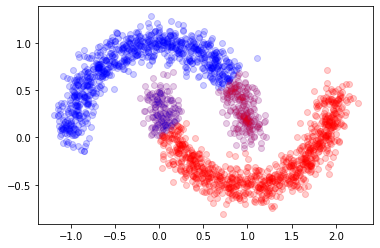

In [13]:
e_net.eval()
y_pred = e_net(torch.tensor(X).to(device).float())
y_pred_np = y_pred.detach().numpy() > 0.5
y_pred_np = y_pred_np.reshape(-1)

tn, fp, fn, tp = confusion_matrix(y, y_pred_np > 0.5).ravel()
print(f'tp {tp}, fp {fp}, tn {tn}, fn {fn}')
plt.scatter(X[y==0,0], X[y==0,1], color='blue', alpha=0.1)
plt.scatter(X[y==1,0], X[y==1,1], color='red', alpha=0.1)

plt.scatter(X[y_pred_np==0,0], X[y_pred_np==0,1], color='blue', alpha=0.1)
plt.scatter(X[y_pred_np==1,0], X[y_pred_np==1,1], color='red', alpha=0.1)

# Pseudo labeling

In [6]:
net_p, loss_p, sgd_p = get_model(device)

/home/ilham/Documents/python/telkom/model.py:38: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  nn.init.uniform(m.weight, a=-0.1, b=0.1)


In [8]:
T1 = 600
T2 = 3500
af = 3

def alpha_weight(step):
    if step < T1:
        return 0.0
    elif step > T2:
        return af
    else:
         return ((step-T1) / (T2-T1))*af

In [9]:
ls_loss_p = []
epoch = 1000
cur_f1 = -1
step = 0
for e in tqdm.tqdm(range(epoch)):
    for batch_idx, (X_unseen, _) in enumerate(unseen_set):
        net_p.eval()
        X_unseen = X_unseen.to(device).float()
        output_unlabeled = net_p(X_unseen)
        output_unlabeled = output_unlabeled.detach().numpy()
        output_unlabeled = output_unlabeled > 0.5
        pseudo_labeled = torch.tensor(output_unlabeled).to(device).float()
        net_p.train()
           
        # Now calculate the unlabeled loss using the pseudo label
        output = net_p(X_unseen)
        unlabeled_loss = alpha_weight(step) * loss_p(output, pseudo_labeled)   
            
        # Backpropogate
        sgd.zero_grad()
        unlabeled_loss.backward()
        sgd.step()

        # For every 50 batches train one epoch on labeled data 
        if batch_idx % 10 == 0:
            # Normal training procedure
            for batch_idx, (X_seen, y_seen) in enumerate(seen_set):
                X_seen = X_seen.to(device).float()
                y_seen = y_seen.to(device).float()
                y_pred = net_p(X_seen)
                bce_loss = loss(y_pred, y_seen)

                sgd_p.zero_grad()
                bce_loss.backward()
                sgd_p.step()

            # Now we increment step by 1
            step += 1
    net_p.eval()
    y_pred = net_p(torch.tensor(X).to(device).float())
    y_pred_np = y_pred.detach().numpy()
    tn, fp, fn, tp = confusion_matrix(y, y_pred_np > 0.5).ravel()
    f1 = f1_score(y, (y_pred_np > 0.5))
    if f1 > cur_f1:
        cur_f1 = f1
        save_checkpoint(net_p, sgd, 'model/pseudo-labeling', e, f1)

    print(f'{e} tp {tp}, fp {fp}, tn {tn}, fn {fn}')

  0%|▏                                         | 3/1000 [00:00<01:25, 11.72it/s]

Saved checkpoint: model/pseudo-labeling/checkpoint_epoch000000000_f1-0.6666666666666666.pth
0 tp 1000, fp 1000, tn 0, fn 0
1 tp 1000, fp 1000, tn 0, fn 0
2 tp 1000, fp 1000, tn 0, fn 0


  0%|▏                                         | 5/1000 [00:00<01:22, 12.02it/s]

3 tp 0, fp 0, tn 1000, fn 1000
4 tp 0, fp 0, tn 1000, fn 1000
5 tp 0, fp 0, tn 1000, fn 1000


  1%|▎                                         | 7/1000 [00:00<01:23, 11.87it/s]

6 tp 1000, fp 1000, tn 0, fn 0
7 tp 0, fp 0, tn 1000, fn 1000


  1%|▍                                         | 9/1000 [00:00<01:41,  9.80it/s]

8 tp 0, fp 0, tn 1000, fn 1000
9 tp 1000, fp 1000, tn 0, fn 0


  1%|▌                                        | 13/1000 [00:01<01:43,  9.51it/s]

10 tp 0, fp 0, tn 1000, fn 1000
11 tp 0, fp 0, tn 1000, fn 1000
12 tp 1000, fp 1000, tn 0, fn 0


  2%|▌                                        | 15/1000 [00:01<01:38, 10.05it/s]

13 tp 0, fp 0, tn 1000, fn 1000
14 tp 0, fp 0, tn 1000, fn 1000
15 tp 1000, fp 1000, tn 0, fn 0


  2%|▊                                        | 19/1000 [00:01<01:29, 10.99it/s]

16 tp 1000, fp 1000, tn 0, fn 0
17 tp 0, fp 0, tn 1000, fn 1000
18 tp 0, fp 0, tn 1000, fn 1000


  2%|▊                                        | 21/1000 [00:01<01:25, 11.43it/s]

19 tp 1000, fp 1000, tn 0, fn 0
20 tp 1000, fp 1000, tn 0, fn 0
21 tp 0, fp 0, tn 1000, fn 1000


  2%|█                                        | 25/1000 [00:02<01:23, 11.63it/s]

22 tp 1000, fp 1000, tn 0, fn 0
23 tp 1000, fp 1000, tn 0, fn 0
24 tp 0, fp 0, tn 1000, fn 1000


  3%|█                                        | 27/1000 [00:02<01:27, 11.15it/s]

25 tp 0, fp 0, tn 1000, fn 1000
26 tp 1000, fp 1000, tn 0, fn 0


  3%|█▏                                       | 29/1000 [00:02<01:36, 10.03it/s]

27 tp 0, fp 0, tn 1000, fn 1000
28 tp 0, fp 0, tn 1000, fn 1000
29 tp 0, fp 0, tn 1000, fn 1000


  3%|█▎                                       | 31/1000 [00:02<01:34, 10.27it/s]

30 tp 0, fp 0, tn 1000, fn 1000
31 tp 0, fp 0, tn 1000, fn 1000


  4%|█▍                                       | 35/1000 [00:03<01:32, 10.44it/s]

32 tp 0, fp 0, tn 1000, fn 1000
33 tp 0, fp 0, tn 1000, fn 1000
34 tp 0, fp 0, tn 1000, fn 1000


  4%|█▌                                       | 37/1000 [00:03<01:28, 10.90it/s]

35 tp 1000, fp 1000, tn 0, fn 0
36 tp 0, fp 0, tn 1000, fn 1000
37 tp 0, fp 0, tn 1000, fn 1000


  4%|█▋                                       | 41/1000 [00:03<01:23, 11.54it/s]

38 tp 0, fp 0, tn 1000, fn 1000
39 tp 0, fp 0, tn 1000, fn 1000
40 tp 0, fp 0, tn 1000, fn 1000


  4%|█▊                                       | 43/1000 [00:04<01:23, 11.41it/s]

41 tp 0, fp 0, tn 1000, fn 1000
42 tp 1000, fp 1000, tn 0, fn 0
43 tp 1000, fp 1000, tn 0, fn 0


  5%|█▉                                       | 47/1000 [00:04<01:19, 11.98it/s]

44 tp 0, fp 0, tn 1000, fn 1000
45 tp 1, fp 0, tn 1000, fn 999
46 tp 1000, fp 1000, tn 0, fn 0


  5%|██                                       | 49/1000 [00:04<01:19, 11.94it/s]

47 tp 0, fp 0, tn 1000, fn 1000
48 tp 0, fp 0, tn 1000, fn 1000
49 tp 0, fp 0, tn 1000, fn 1000


  5%|██▏                                      | 53/1000 [00:04<01:17, 12.27it/s]

50 tp 1000, fp 1000, tn 0, fn 0
51 tp 1000, fp 1000, tn 0, fn 0
52 tp 1000, fp 1000, tn 0, fn 0


  6%|██▎                                      | 55/1000 [00:04<01:16, 12.36it/s]

53 tp 1000, fp 1000, tn 0, fn 0
54 tp 1000, fp 1000, tn 0, fn 0
55 tp 0, fp 0, tn 1000, fn 1000


  6%|██▍                                      | 59/1000 [00:05<01:17, 12.16it/s]

56 tp 0, fp 0, tn 1000, fn 1000
57 tp 0, fp 0, tn 1000, fn 1000
Saved checkpoint: model/pseudo-labeling/checkpoint_epoch000000058_f1-0.7507507507507508.pth
58 tp 1000, fp 664, tn 336, fn 0


  6%|██▌                                      | 61/1000 [00:05<01:16, 12.20it/s]

59 tp 0, fp 0, tn 1000, fn 1000
60 tp 0, fp 0, tn 1000, fn 1000
61 tp 0, fp 0, tn 1000, fn 1000


  6%|██▋                                      | 65/1000 [00:05<01:15, 12.32it/s]

62 tp 1000, fp 1000, tn 0, fn 0
63 tp 0, fp 0, tn 1000, fn 1000
64 tp 1000, fp 1000, tn 0, fn 0


  7%|██▋                                      | 67/1000 [00:05<01:19, 11.66it/s]

65 tp 1000, fp 1000, tn 0, fn 0
66 tp 0, fp 0, tn 1000, fn 1000


  7%|██▊                                      | 69/1000 [00:06<01:35,  9.75it/s]

67 tp 1000, fp 1000, tn 0, fn 0
68 tp 0, fp 0, tn 1000, fn 1000


  7%|██▉                                      | 71/1000 [00:06<01:42,  9.03it/s]

69 tp 1000, fp 1000, tn 0, fn 0
70 tp 0, fp 0, tn 1000, fn 1000


  7%|███                                      | 74/1000 [00:06<01:37,  9.47it/s]

71 tp 0, fp 0, tn 1000, fn 1000
72 tp 1000, fp 1000, tn 0, fn 0
73 tp 0, fp 0, tn 1000, fn 1000


  8%|███                                      | 76/1000 [00:07<01:31, 10.06it/s]

74 tp 0, fp 0, tn 1000, fn 1000
75 tp 0, fp 0, tn 1000, fn 1000
76 tp 1000, fp 1000, tn 0, fn 0


  8%|███▎                                     | 80/1000 [00:07<01:29, 10.26it/s]

77 tp 0, fp 0, tn 1000, fn 1000
78 tp 0, fp 0, tn 1000, fn 1000
79 tp 0, fp 0, tn 1000, fn 1000


  8%|███▎                                     | 82/1000 [00:07<01:27, 10.54it/s]

80 tp 0, fp 0, tn 1000, fn 1000
81 tp 0, fp 0, tn 1000, fn 1000
82 tp 1000, fp 1000, tn 0, fn 0


  9%|███▌                                     | 86/1000 [00:07<01:19, 11.43it/s]

83 tp 1000, fp 1000, tn 0, fn 0
84 tp 0, fp 0, tn 1000, fn 1000
85 tp 1000, fp 1000, tn 0, fn 0


  9%|███▌                                     | 88/1000 [00:08<01:17, 11.73it/s]

86 tp 0, fp 0, tn 1000, fn 1000
87 tp 1000, fp 1000, tn 0, fn 0
88 tp 3, fp 0, tn 1000, fn 997


  9%|███▊                                     | 92/1000 [00:08<01:13, 12.29it/s]

89 tp 0, fp 0, tn 1000, fn 1000
90 tp 0, fp 0, tn 1000, fn 1000
91 tp 1000, fp 1000, tn 0, fn 0


  9%|███▊                                     | 94/1000 [00:08<01:13, 12.38it/s]

92 tp 1000, fp 1000, tn 0, fn 0
93 tp 1000, fp 1000, tn 0, fn 0
Saved checkpoint: model/pseudo-labeling/checkpoint_epoch000000094_f1-0.772117962466488.pth
94 tp 720, fp 145, tn 855, fn 280


 10%|████                                     | 98/1000 [00:08<01:12, 12.46it/s]

95 tp 6, fp 0, tn 1000, fn 994
Saved checkpoint: model/pseudo-labeling/checkpoint_epoch000000096_f1-0.8076225045372051.pth
96 tp 890, fp 314, tn 686, fn 110
97 tp 0, fp 0, tn 1000, fn 1000


 10%|████                                    | 100/1000 [00:09<01:21, 11.03it/s]

Saved checkpoint: model/pseudo-labeling/checkpoint_epoch000000098_f1-0.8216123499142367.pth
98 tp 958, fp 374, tn 626, fn 42
99 tp 527, fp 0, tn 1000, fn 473


 10%|████                                    | 102/1000 [00:09<01:30,  9.89it/s]

100 tp 1000, fp 761, tn 239, fn 0
101 tp 649, fp 66, tn 934, fn 351


 10%|████▏                                   | 104/1000 [00:09<01:38,  9.06it/s]

102 tp 851, fp 271, tn 729, fn 149
103 tp 825, fp 246, tn 754, fn 175


 11%|████▏                                   | 106/1000 [00:09<01:46,  8.36it/s]

104 tp 770, fp 191, tn 809, fn 230
105 tp 793, fp 205, tn 795, fn 207


 11%|████▎                                   | 109/1000 [00:10<01:31,  9.76it/s]

106 tp 820, fp 240, tn 760, fn 180
107 tp 770, fp 189, tn 811, fn 230
108 tp 817, fp 234, tn 766, fn 183


 11%|████▍                                   | 111/1000 [00:10<01:24, 10.57it/s]

109 tp 817, fp 231, tn 769, fn 183
110 tp 745, fp 146, tn 854, fn 255
111 tp 822, fp 227, tn 773, fn 178


 11%|████▌                                   | 113/1000 [00:10<01:21, 10.91it/s]

112 tp 832, fp 240, tn 760, fn 168
113 tp 799, fp 194, tn 806, fn 201


 12%|████▋                                   | 117/1000 [00:10<01:25, 10.32it/s]

114 tp 805, fp 198, tn 802, fn 195
115 tp 788, fp 185, tn 815, fn 212
116 tp 797, fp 189, tn 811, fn 203


 12%|████▊                                   | 119/1000 [00:11<01:25, 10.30it/s]

117 tp 810, fp 198, tn 802, fn 190
118 tp 800, fp 183, tn 817, fn 200
119 tp 808, fp 188, tn 812, fn 192


 12%|████▉                                   | 123/1000 [00:11<01:21, 10.76it/s]

120 tp 813, fp 190, tn 810, fn 187
121 tp 799, fp 164, tn 836, fn 201
122 tp 773, fp 145, tn 855, fn 227


 12%|█████                                   | 125/1000 [00:11<01:27,  9.95it/s]

123 tp 816, fp 190, tn 810, fn 184
124 tp 813, fp 179, tn 821, fn 187
125 tp 807, fp 160, tn 840, fn 193


 13%|█████▏                                  | 129/1000 [00:11<01:17, 11.21it/s]

126 tp 816, fp 182, tn 818, fn 184
Saved checkpoint: model/pseudo-labeling/checkpoint_epoch000000127_f1-0.8218071680969207.pth
127 tp 814, fp 167, tn 833, fn 186
128 tp 818, fp 181, tn 819, fn 182


 13%|█████▏                                  | 131/1000 [00:12<01:15, 11.53it/s]

Saved checkpoint: model/pseudo-labeling/checkpoint_epoch000000129_f1-0.8268156424581006.pth
129 tp 814, fp 155, tn 845, fn 186
130 tp 816, fp 162, tn 838, fn 184
131 tp 837, fp 188, tn 812, fn 163


 13%|█████▎                                  | 133/1000 [00:12<01:15, 11.41it/s]

Saved checkpoint: model/pseudo-labeling/checkpoint_epoch000000132_f1-0.829985301322881.pth
132 tp 847, fp 194, tn 806, fn 153
133 tp 831, fp 182, tn 818, fn 169


 14%|█████▍                                  | 135/1000 [00:12<01:27,  9.85it/s]

134 tp 816, fp 155, tn 845, fn 184
135 tp 829, fp 169, tn 831, fn 171


 14%|█████▌                                  | 138/1000 [00:13<01:40,  8.59it/s]

136 tp 835, fp 178, tn 822, fn 165
Saved checkpoint: model/pseudo-labeling/checkpoint_epoch000000137_f1-0.8311045071817732.pth
137 tp 839, fp 180, tn 820, fn 161


 14%|█████▌                                  | 140/1000 [00:13<01:46,  8.11it/s]

Saved checkpoint: model/pseudo-labeling/checkpoint_epoch000000138_f1-0.8334172118772019.pth
138 tp 828, fp 159, tn 841, fn 172
Saved checkpoint: model/pseudo-labeling/checkpoint_epoch000000139_f1-0.8337444499259989.pth
139 tp 845, fp 182, tn 818, fn 155


 14%|█████▋                                  | 142/1000 [00:13<01:31,  9.35it/s]

Saved checkpoint: model/pseudo-labeling/checkpoint_epoch000000140_f1-0.8364348677766895.pth
140 tp 854, fp 188, tn 812, fn 146
141 tp 827, fp 154, tn 846, fn 173
142 tp 819, fp 145, tn 855, fn 181


 14%|█████▊                                  | 144/1000 [00:13<01:23, 10.23it/s]

Saved checkpoint: model/pseudo-labeling/checkpoint_epoch000000143_f1-0.8374142997061704.pth
143 tp 855, fp 187, tn 813, fn 145
Saved checkpoint: model/pseudo-labeling/checkpoint_epoch000000144_f1-0.8378245957863791.pth
144 tp 855, fp 186, tn 814, fn 145


 15%|█████▉                                  | 147/1000 [00:13<01:31,  9.29it/s]

Saved checkpoint: model/pseudo-labeling/checkpoint_epoch000000145_f1-0.8387413962635203.pth
145 tp 853, fp 181, tn 819, fn 147
Saved checkpoint: model/pseudo-labeling/checkpoint_epoch000000146_f1-0.8403779214321233.pth
146 tp 845, fp 166, tn 834, fn 155


 15%|█████▉                                  | 149/1000 [00:14<01:33,  9.15it/s]

Saved checkpoint: model/pseudo-labeling/checkpoint_epoch000000147_f1-0.8441558441558441.pth
147 tp 845, fp 157, tn 843, fn 155
148 tp 846, fp 159, tn 841, fn 154
149 tp 824, fp 137, tn 863, fn 176


 15%|██████                                  | 153/1000 [00:14<01:16, 11.04it/s]

Saved checkpoint: model/pseudo-labeling/checkpoint_epoch000000150_f1-0.8451548451548452.pth
150 tp 846, fp 156, tn 844, fn 154
Saved checkpoint: model/pseudo-labeling/checkpoint_epoch000000151_f1-0.8460019743336624.pth
151 tp 857, fp 169, tn 831, fn 143
Saved checkpoint: model/pseudo-labeling/checkpoint_epoch000000152_f1-0.8545454545454546.pth
152 tp 893, fp 197, tn 803, fn 107


 16%|██████▏                                 | 155/1000 [00:14<01:13, 11.46it/s]

153 tp 882, fp 189, tn 811, fn 118
Saved checkpoint: model/pseudo-labeling/checkpoint_epoch000000154_f1-0.8590476190476191.pth
154 tp 902, fp 198, tn 802, fn 98
155 tp 886, fp 191, tn 809, fn 114


 16%|██████▎                                 | 159/1000 [00:14<01:10, 11.97it/s]

156 tp 860, fp 165, tn 835, fn 140
157 tp 861, fp 167, tn 833, fn 139
158 tp 873, fp 182, tn 818, fn 127


 16%|██████▍                                 | 161/1000 [00:15<01:20, 10.42it/s]

159 tp 882, fp 188, tn 812, fn 118
160 tp 878, fp 184, tn 816, fn 122


 16%|██████▌                                 | 163/1000 [00:15<01:28,  9.44it/s]

161 tp 867, fp 169, tn 831, fn 133
162 tp 862, fp 165, tn 835, fn 138


 16%|██████▌                                 | 165/1000 [00:15<01:35,  8.72it/s]

163 tp 851, fp 151, tn 849, fn 149
164 tp 855, fp 155, tn 845, fn 145


 17%|██████▋                                 | 167/1000 [00:15<01:25,  9.80it/s]

165 tp 896, fp 192, tn 808, fn 104
166 tp 894, fp 189, tn 811, fn 106
167 tp 888, fp 186, tn 814, fn 112


 17%|██████▊                                 | 169/1000 [00:16<01:18, 10.54it/s]

168 tp 869, fp 167, tn 833, fn 131
169 tp 878, fp 173, tn 827, fn 122


 17%|██████▉                                 | 172/1000 [00:16<01:31,  9.07it/s]

170 tp 860, fp 155, tn 845, fn 140
171 tp 872, fp 168, tn 832, fn 128


 17%|██████▉                                 | 174/1000 [00:16<01:35,  8.65it/s]

172 tp 861, fp 155, tn 845, fn 139
173 tp 884, fp 176, tn 824, fn 116
174 tp 891, fp 186, tn 814, fn 109


 18%|███████                                 | 178/1000 [00:17<01:17, 10.56it/s]

175 tp 860, fp 152, tn 848, fn 140
176 tp 871, fp 162, tn 838, fn 129
Saved checkpoint: model/pseudo-labeling/checkpoint_epoch000000177_f1-0.8595041322314049.pth
177 tp 884, fp 173, tn 827, fn 116


 18%|███████▏                                | 180/1000 [00:17<01:21, 10.09it/s]

Saved checkpoint: model/pseudo-labeling/checkpoint_epoch000000178_f1-0.861244019138756.pth
178 tp 900, fp 190, tn 810, fn 100
179 tp 890, fp 186, tn 814, fn 110
Saved checkpoint: model/pseudo-labeling/checkpoint_epoch000000180_f1-0.8654028436018958.pth
180 tp 913, fp 197, tn 803, fn 87


 18%|███████▎                                | 183/1000 [00:17<01:26,  9.49it/s]

181 tp 891, fp 185, tn 815, fn 109
182 tp 909, fp 194, tn 806, fn 91
183 tp 908, fp 193, tn 807, fn 92


 19%|███████▍                                | 187/1000 [00:17<01:13, 11.01it/s]

184 tp 890, fp 184, tn 816, fn 110
185 tp 887, fp 173, tn 827, fn 113
186 tp 904, fp 190, tn 810, fn 96


 19%|███████▌                                | 189/1000 [00:18<01:14, 10.82it/s]

187 tp 886, fp 173, tn 827, fn 114
188 tp 889, fp 178, tn 822, fn 111


 19%|███████▋                                | 191/1000 [00:18<01:20, 10.01it/s]

189 tp 893, fp 181, tn 819, fn 107
190 tp 863, fp 148, tn 852, fn 137


 19%|███████▋                                | 193/1000 [00:18<01:24,  9.59it/s]

191 tp 888, fp 174, tn 826, fn 112
192 tp 910, fp 194, tn 806, fn 90
Saved checkpoint: model/pseudo-labeling/checkpoint_epoch000000193_f1-0.8675496688741721.pth
193 tp 917, fp 197, tn 803, fn 83


 20%|███████▉                                | 197/1000 [00:18<01:17, 10.30it/s]

194 tp 914, fp 195, tn 805, fn 86
195 tp 906, fp 188, tn 812, fn 94
196 tp 877, fp 158, tn 842, fn 123


 20%|███████▉                                | 199/1000 [00:19<01:14, 10.75it/s]

197 tp 909, fp 191, tn 809, fn 91
198 tp 890, fp 174, tn 826, fn 110
199 tp 895, fp 183, tn 817, fn 105


 20%|████████                                | 203/1000 [00:19<01:11, 11.11it/s]

200 tp 909, fp 194, tn 806, fn 91
201 tp 904, fp 188, tn 812, fn 96
202 tp 893, fp 178, tn 822, fn 107


 20%|████████▏                               | 205/1000 [00:19<01:19,  9.97it/s]

203 tp 860, fp 144, tn 856, fn 140
204 tp 884, fp 166, tn 834, fn 116


 21%|████████▎                               | 207/1000 [00:19<01:20,  9.84it/s]

205 tp 899, fp 186, tn 814, fn 101
206 tp 884, fp 164, tn 836, fn 116


 21%|████████▎                               | 209/1000 [00:20<01:25,  9.22it/s]

207 tp 904, fp 186, tn 814, fn 96
208 tp 913, fp 194, tn 806, fn 87


 21%|████████▍                               | 211/1000 [00:20<01:32,  8.56it/s]

Saved checkpoint: model/pseudo-labeling/checkpoint_epoch000000209_f1-0.8682097307510628.pth
209 tp 919, fp 198, tn 802, fn 81
210 tp 898, fp 183, tn 817, fn 102


 21%|████████▌                               | 213/1000 [00:20<01:28,  8.92it/s]

211 tp 870, fp 150, tn 850, fn 130
212 tp 889, fp 171, tn 829, fn 111


 22%|████████▋                               | 216/1000 [00:20<01:18, 10.02it/s]

Saved checkpoint: model/pseudo-labeling/checkpoint_epoch000000213_f1-0.8720821661998133.pth
213 tp 934, fp 208, tn 792, fn 66
214 tp 888, fp 169, tn 831, fn 112
215 tp 930, fp 203, tn 797, fn 70


 22%|████████▋                               | 218/1000 [00:21<01:21,  9.58it/s]

216 tp 927, fp 202, tn 798, fn 73
Saved checkpoint: model/pseudo-labeling/checkpoint_epoch000000217_f1-0.8724894908921065.pth
217 tp 934, fp 207, tn 793, fn 66


 22%|████████▊                               | 221/1000 [00:21<01:18,  9.92it/s]

218 tp 934, fp 209, tn 791, fn 66
219 tp 930, fp 202, tn 798, fn 70
220 tp 910, fp 191, tn 809, fn 90


 22%|████████▉                               | 223/1000 [00:21<01:30,  8.60it/s]

221 tp 906, fp 187, tn 813, fn 94
222 tp 916, fp 196, tn 804, fn 84


 22%|█████████                               | 225/1000 [00:21<01:34,  8.21it/s]

223 tp 921, fp 197, tn 803, fn 79
224 tp 912, fp 193, tn 807, fn 88


 23%|█████████                               | 228/1000 [00:22<01:21,  9.52it/s]

225 tp 908, fp 187, tn 813, fn 92
226 tp 915, fp 193, tn 807, fn 85
227 tp 910, fp 191, tn 809, fn 90


 23%|█████████▏                              | 230/1000 [00:22<01:14, 10.38it/s]

228 tp 897, fp 172, tn 828, fn 103
229 tp 914, fp 193, tn 807, fn 86
Saved checkpoint: model/pseudo-labeling/checkpoint_epoch000000230_f1-0.874296435272045.pth
230 tp 932, fp 200, tn 800, fn 68


 23%|█████████▎                              | 233/1000 [00:22<01:19,  9.59it/s]

231 tp 934, fp 206, tn 794, fn 66
232 tp 934, fp 203, tn 797, fn 66


 24%|█████████▍                              | 235/1000 [00:22<01:23,  9.18it/s]

233 tp 923, fp 197, tn 803, fn 77
234 tp 902, fp 173, tn 827, fn 98


 24%|█████████▍                              | 237/1000 [00:23<01:26,  8.79it/s]

235 tp 917, fp 194, tn 806, fn 83
236 tp 921, fp 197, tn 803, fn 79


 24%|█████████▌                              | 239/1000 [00:23<01:18,  9.72it/s]

237 tp 904, fp 176, tn 824, fn 96
238 tp 905, fp 182, tn 818, fn 95
239 tp 925, fp 197, tn 803, fn 75


 24%|█████████▋                              | 241/1000 [00:23<01:11, 10.56it/s]

240 tp 917, fp 194, tn 806, fn 83
241 tp 909, fp 188, tn 812, fn 91


 24%|█████████▊                              | 245/1000 [00:23<01:13, 10.31it/s]

242 tp 893, fp 165, tn 835, fn 107
243 tp 886, fp 157, tn 843, fn 114
244 tp 911, fp 193, tn 807, fn 89


 25%|█████████▉                              | 247/1000 [00:24<01:11, 10.59it/s]

245 tp 923, fp 198, tn 802, fn 77
246 tp 925, fp 199, tn 801, fn 75
247 tp 925, fp 198, tn 802, fn 75


 25%|██████████                              | 251/1000 [00:24<01:06, 11.32it/s]

248 tp 918, fp 197, tn 803, fn 82
249 tp 928, fp 198, tn 802, fn 72
250 tp 917, fp 194, tn 806, fn 83


 25%|██████████                              | 253/1000 [00:24<01:05, 11.33it/s]

251 tp 911, fp 191, tn 809, fn 89
252 tp 934, fp 203, tn 797, fn 66
253 tp 942, fp 223, tn 777, fn 58


 26%|██████████▎                             | 257/1000 [00:25<01:08, 10.79it/s]

254 tp 925, fp 199, tn 801, fn 75
255 tp 911, fp 191, tn 809, fn 89
256 tp 909, fp 189, tn 811, fn 91


 26%|██████████▎                             | 259/1000 [00:25<01:11, 10.41it/s]

257 tp 926, fp 197, tn 803, fn 74
258 tp 934, fp 204, tn 796, fn 66
259 tp 906, fp 184, tn 816, fn 94


 26%|██████████▌                             | 263/1000 [00:25<01:05, 11.25it/s]

260 tp 910, fp 189, tn 811, fn 90
261 tp 934, fp 203, tn 797, fn 66
262 tp 941, fp 221, tn 779, fn 59


 26%|██████████▌                             | 265/1000 [00:25<01:07, 10.81it/s]

263 tp 930, fp 199, tn 801, fn 70
264 tp 934, fp 206, tn 794, fn 66
265 tp 923, fp 197, tn 803, fn 77


 27%|██████████▊                             | 269/1000 [00:26<01:09, 10.52it/s]

266 tp 935, fp 211, tn 789, fn 65
267 tp 950, fp 233, tn 767, fn 50
268 tp 941, fp 220, tn 780, fn 59


 27%|██████████▊                             | 271/1000 [00:26<01:06, 11.04it/s]

269 tp 913, fp 193, tn 807, fn 87
270 tp 934, fp 204, tn 796, fn 66
271 tp 941, fp 220, tn 780, fn 59


 28%|███████████                             | 275/1000 [00:26<01:02, 11.56it/s]

Saved checkpoint: model/pseudo-labeling/checkpoint_epoch000000272_f1-0.8749414519906323.pth
272 tp 934, fp 201, tn 799, fn 66
273 tp 935, fp 212, tn 788, fn 65
274 tp 940, fp 216, tn 784, fn 60


 28%|███████████                             | 277/1000 [00:26<01:02, 11.61it/s]

275 tp 942, fp 226, tn 774, fn 58
276 tp 942, fp 224, tn 776, fn 58
277 tp 940, fp 216, tn 784, fn 60


 28%|███████████▏                            | 279/1000 [00:26<01:00, 11.83it/s]

278 tp 942, fp 224, tn 776, fn 58
279 tp 942, fp 224, tn 776, fn 58


 28%|███████████▎                            | 283/1000 [00:27<01:03, 11.27it/s]

280 tp 935, fp 210, tn 790, fn 65
281 tp 935, fp 213, tn 787, fn 65
282 tp 934, fp 204, tn 796, fn 66


 28%|███████████▍                            | 285/1000 [00:27<01:02, 11.48it/s]

283 tp 931, fp 198, tn 802, fn 69
284 tp 940, fp 215, tn 785, fn 60
285 tp 953, fp 236, tn 764, fn 47


 29%|███████████▌                            | 289/1000 [00:27<00:59, 11.92it/s]

286 tp 942, fp 218, tn 782, fn 58
287 tp 942, fp 224, tn 776, fn 58
288 tp 942, fp 228, tn 772, fn 58


 29%|███████████▋                            | 291/1000 [00:28<01:09, 10.24it/s]

289 tp 951, fp 231, tn 769, fn 49
290 tp 942, fp 224, tn 776, fn 58


 29%|███████████▋                            | 293/1000 [00:28<01:11,  9.82it/s]

291 tp 930, fp 197, tn 803, fn 70
292 tp 938, fp 210, tn 790, fn 62


 30%|███████████▊                            | 295/1000 [00:28<01:11,  9.82it/s]

293 tp 942, fp 218, tn 782, fn 58
294 tp 950, fp 229, tn 771, fn 50
295 tp 948, fp 229, tn 771, fn 52


 30%|███████████▉                            | 299/1000 [00:28<01:07, 10.39it/s]

296 tp 941, fp 215, tn 785, fn 59
297 tp 941, fp 216, tn 784, fn 59
298 tp 942, fp 218, tn 782, fn 58


 30%|████████████                            | 301/1000 [00:29<01:06, 10.55it/s]

299 tp 942, fp 218, tn 782, fn 58
300 tp 943, fp 225, tn 775, fn 57


 30%|████████████                            | 303/1000 [00:29<01:08, 10.15it/s]

301 tp 954, fp 233, tn 767, fn 46
302 tp 942, fp 218, tn 782, fn 58
303 tp 946, fp 229, tn 771, fn 54


 31%|████████████▎                           | 307/1000 [00:29<01:03, 10.92it/s]

304 tp 947, fp 229, tn 771, fn 53
305 tp 947, fp 229, tn 771, fn 53
306 tp 941, fp 215, tn 785, fn 59


 31%|████████████▎                           | 309/1000 [00:29<01:08, 10.11it/s]

307 tp 942, fp 222, tn 778, fn 58
308 tp 934, fp 204, tn 796, fn 66


 31%|████████████▍                           | 311/1000 [00:30<01:12,  9.46it/s]

309 tp 941, fp 217, tn 783, fn 59
310 tp 956, fp 239, tn 761, fn 44


 31%|████████████▌                           | 314/1000 [00:30<01:09,  9.91it/s]

311 tp 954, fp 239, tn 761, fn 46
312 tp 953, fp 232, tn 768, fn 47
313 tp 941, fp 213, tn 787, fn 59


 32%|████████████▋                           | 316/1000 [00:30<01:05, 10.46it/s]

314 tp 954, fp 238, tn 762, fn 46
315 tp 961, fp 239, tn 761, fn 39
316 tp 963, fp 246, tn 754, fn 37


 32%|████████████▊                           | 320/1000 [00:30<01:00, 11.17it/s]

317 tp 953, fp 233, tn 767, fn 47
318 tp 963, fp 250, tn 750, fn 37
319 tp 947, fp 229, tn 771, fn 53


 32%|████████████▉                           | 322/1000 [00:31<00:59, 11.36it/s]

320 tp 942, fp 224, tn 776, fn 58
321 tp 941, fp 217, tn 783, fn 59
322 tp 946, fp 229, tn 771, fn 54


 32%|████████████▉                           | 324/1000 [00:31<01:06, 10.17it/s]

323 tp 954, fp 238, tn 762, fn 46
324 tp 954, fp 238, tn 762, fn 46


 33%|█████████████                           | 328/1000 [00:31<01:07,  9.97it/s]

325 tp 942, fp 220, tn 780, fn 58
326 tp 953, fp 232, tn 768, fn 47
327 tp 954, fp 233, tn 767, fn 46


 33%|█████████████▏                          | 330/1000 [00:31<01:03, 10.53it/s]

328 tp 948, fp 229, tn 771, fn 52
329 tp 954, fp 238, tn 762, fn 46
330 tp 956, fp 239, tn 761, fn 44


 33%|█████████████▎                          | 334/1000 [00:32<00:58, 11.47it/s]

331 tp 946, fp 226, tn 774, fn 54
332 tp 954, fp 238, tn 762, fn 46
333 tp 954, fp 239, tn 761, fn 46


 34%|█████████████▍                          | 336/1000 [00:32<00:57, 11.55it/s]

334 tp 943, fp 224, tn 776, fn 57
335 tp 953, fp 231, tn 769, fn 47


 34%|█████████████▌                          | 338/1000 [00:32<01:02, 10.56it/s]

336 tp 942, fp 221, tn 779, fn 58
337 tp 942, fp 217, tn 783, fn 58
338 tp 963, fp 250, tn 750, fn 37


 34%|█████████████▋                          | 342/1000 [00:32<00:57, 11.50it/s]

339 tp 961, fp 239, tn 761, fn 39
340 tp 951, fp 229, tn 771, fn 49
341 tp 961, fp 243, tn 757, fn 39


 34%|█████████████▊                          | 344/1000 [00:33<01:04, 10.21it/s]

342 tp 963, fp 246, tn 754, fn 37
343 tp 961, fp 239, tn 761, fn 39


 35%|█████████████▊                          | 346/1000 [00:33<01:06,  9.86it/s]

344 tp 963, fp 250, tn 750, fn 37
345 tp 960, fp 239, tn 761, fn 40
346 tp 953, fp 231, tn 769, fn 47


 35%|██████████████                          | 350/1000 [00:33<01:01, 10.51it/s]

347 tp 954, fp 233, tn 767, fn 46
348 tp 949, fp 229, tn 771, fn 51
349 tp 954, fp 237, tn 763, fn 46


 35%|██████████████                          | 352/1000 [00:33<00:59, 10.96it/s]

350 tp 963, fp 245, tn 755, fn 37
351 tp 953, fp 232, tn 768, fn 47
352 tp 963, fp 244, tn 756, fn 37


 36%|██████████████▏                         | 356/1000 [00:34<01:01, 10.49it/s]

353 tp 968, fp 263, tn 737, fn 32
354 tp 954, fp 237, tn 763, fn 46
355 tp 954, fp 234, tn 766, fn 46


 36%|██████████████▎                         | 358/1000 [00:34<01:01, 10.50it/s]

356 tp 963, fp 245, tn 755, fn 37
357 tp 968, fp 265, tn 735, fn 32


 36%|██████████████▍                         | 360/1000 [00:34<01:02, 10.25it/s]

358 tp 964, fp 257, tn 743, fn 36
359 tp 967, fp 260, tn 740, fn 33
360 tp 967, fp 260, tn 740, fn 33


 36%|██████████████▌                         | 364/1000 [00:35<00:59, 10.61it/s]

361 tp 967, fp 263, tn 737, fn 33
362 tp 964, fp 258, tn 742, fn 36
363 tp 962, fp 244, tn 756, fn 38


 37%|██████████████▋                         | 366/1000 [00:35<01:02, 10.22it/s]

364 tp 953, fp 230, tn 770, fn 47
365 tp 946, fp 227, tn 773, fn 54
366 tp 959, fp 239, tn 761, fn 41


 37%|██████████████▊                         | 370/1000 [00:35<00:57, 10.87it/s]

367 tp 963, fp 246, tn 754, fn 37
368 tp 963, fp 254, tn 746, fn 37
369 tp 961, fp 242, tn 758, fn 39


 37%|██████████████▉                         | 372/1000 [00:35<00:57, 10.84it/s]

370 tp 962, fp 243, tn 757, fn 38
371 tp 968, fp 263, tn 737, fn 32


 37%|██████████████▉                         | 374/1000 [00:36<01:00, 10.27it/s]

372 tp 969, fp 269, tn 731, fn 31
373 tp 964, fp 259, tn 741, fn 36


 38%|███████████████                         | 376/1000 [00:36<01:00, 10.25it/s]

374 tp 961, fp 240, tn 760, fn 39
375 tp 968, fp 265, tn 735, fn 32
376 tp 970, fp 270, tn 730, fn 30


 38%|███████████████                         | 378/1000 [00:36<01:01, 10.14it/s]

377 tp 964, fp 257, tn 743, fn 36
378 tp 961, fp 242, tn 758, fn 39


 38%|███████████████▎                        | 382/1000 [00:36<00:59, 10.33it/s]

379 tp 953, fp 229, tn 771, fn 47
380 tp 954, fp 237, tn 763, fn 46
381 tp 970, fp 275, tn 725, fn 30


 38%|███████████████▎                        | 384/1000 [00:37<01:04,  9.59it/s]

382 tp 967, fp 262, tn 738, fn 33
383 tp 963, fp 253, tn 747, fn 37


 39%|███████████████▍                        | 386/1000 [00:37<01:01,  9.96it/s]

384 tp 963, fp 252, tn 748, fn 37
385 tp 967, fp 265, tn 735, fn 33
386 tp 967, fp 261, tn 739, fn 33


 39%|███████████████▌                        | 390/1000 [00:37<00:54, 11.12it/s]

387 tp 968, fp 265, tn 735, fn 32
388 tp 964, fp 257, tn 743, fn 36
389 tp 966, fp 260, tn 740, fn 34


 39%|███████████████▋                        | 392/1000 [00:37<00:56, 10.75it/s]

390 tp 963, fp 253, tn 747, fn 37
391 tp 963, fp 250, tn 750, fn 37
392 tp 961, fp 242, tn 758, fn 39


 40%|███████████████▊                        | 396/1000 [00:38<00:59, 10.14it/s]

393 tp 954, fp 239, tn 761, fn 46
394 tp 961, fp 242, tn 758, fn 39
395 tp 964, fp 257, tn 743, fn 36


 40%|███████████████▉                        | 398/1000 [00:38<00:55, 10.76it/s]

396 tp 964, fp 257, tn 743, fn 36
397 tp 968, fp 265, tn 735, fn 32
398 tp 961, fp 242, tn 758, fn 39


 40%|████████████████                        | 402/1000 [00:38<00:53, 11.21it/s]

399 tp 954, fp 236, tn 764, fn 46
400 tp 964, fp 255, tn 745, fn 36
401 tp 968, fp 265, tn 735, fn 32


 40%|████████████████▏                       | 404/1000 [00:38<00:56, 10.55it/s]

402 tp 968, fp 268, tn 732, fn 32
403 tp 970, fp 270, tn 730, fn 30
404 tp 968, fp 265, tn 735, fn 32


 41%|████████████████▎                       | 408/1000 [00:39<00:54, 10.91it/s]

405 tp 970, fp 277, tn 723, fn 30
406 tp 967, fp 264, tn 736, fn 33
407 tp 970, fp 270, tn 730, fn 30


 41%|████████████████▍                       | 410/1000 [00:39<00:53, 10.96it/s]

408 tp 964, fp 256, tn 744, fn 36
409 tp 970, fp 272, tn 728, fn 30
410 tp 968, fp 265, tn 735, fn 32


 41%|████████████████▌                       | 414/1000 [00:39<00:52, 11.09it/s]

411 tp 964, fp 257, tn 743, fn 36
412 tp 961, fp 242, tn 758, fn 39
413 tp 970, fp 271, tn 729, fn 30


 42%|████████████████▋                       | 416/1000 [00:40<00:51, 11.42it/s]

414 tp 967, fp 261, tn 739, fn 33
415 tp 960, fp 239, tn 761, fn 40
416 tp 968, fp 265, tn 735, fn 32


 42%|████████████████▊                       | 420/1000 [00:40<00:52, 11.14it/s]

417 tp 968, fp 266, tn 734, fn 32
418 tp 963, fp 254, tn 746, fn 37
419 tp 969, fp 268, tn 732, fn 31


 42%|████████████████▉                       | 422/1000 [00:40<00:53, 10.72it/s]

420 tp 968, fp 265, tn 735, fn 32
421 tp 967, fp 265, tn 735, fn 33
422 tp 968, fp 266, tn 734, fn 32


 43%|█████████████████                       | 426/1000 [00:40<00:50, 11.44it/s]

423 tp 965, fp 259, tn 741, fn 35
424 tp 970, fp 272, tn 728, fn 30
425 tp 980, fp 297, tn 703, fn 20


 43%|█████████████████                       | 428/1000 [00:41<00:51, 11.19it/s]

426 tp 980, fp 294, tn 706, fn 20
427 tp 970, fp 274, tn 726, fn 30
428 tp 963, fp 250, tn 750, fn 37


 43%|█████████████████▎                      | 432/1000 [00:41<00:51, 11.05it/s]

429 tp 970, fp 270, tn 730, fn 30
430 tp 970, fp 270, tn 730, fn 30
431 tp 970, fp 274, tn 726, fn 30


 43%|█████████████████▎                      | 434/1000 [00:41<00:49, 11.38it/s]

432 tp 978, fp 283, tn 717, fn 22
433 tp 974, fp 279, tn 721, fn 26
434 tp 972, fp 278, tn 722, fn 28


 44%|█████████████████▌                      | 438/1000 [00:42<00:51, 10.97it/s]

435 tp 970, fp 277, tn 723, fn 30
436 tp 970, fp 271, tn 729, fn 30
437 tp 969, fp 268, tn 732, fn 31


 44%|█████████████████▌                      | 440/1000 [00:42<00:51, 10.87it/s]

438 tp 971, fp 277, tn 723, fn 29
439 tp 971, fp 277, tn 723, fn 29
440 tp 970, fp 274, tn 726, fn 30


 44%|█████████████████▊                      | 444/1000 [00:42<00:47, 11.74it/s]

441 tp 970, fp 273, tn 727, fn 30
442 tp 970, fp 274, tn 726, fn 30
443 tp 970, fp 269, tn 731, fn 30


 45%|█████████████████▊                      | 446/1000 [00:42<00:49, 11.08it/s]

444 tp 980, fp 288, tn 712, fn 20
445 tp 970, fp 275, tn 725, fn 30
446 tp 973, fp 278, tn 722, fn 27


 45%|██████████████████                      | 450/1000 [00:43<00:51, 10.71it/s]

447 tp 965, fp 258, tn 742, fn 35
448 tp 970, fp 277, tn 723, fn 30
449 tp 966, fp 260, tn 740, fn 34


 45%|██████████████████                      | 452/1000 [00:43<00:50, 10.87it/s]

450 tp 970, fp 274, tn 726, fn 30
451 tp 971, fp 278, tn 722, fn 29
452 tp 972, fp 279, tn 721, fn 28


 46%|██████████████████▏                     | 456/1000 [00:43<00:50, 10.78it/s]

453 tp 970, fp 270, tn 730, fn 30
454 tp 975, fp 279, tn 721, fn 25
455 tp 976, fp 279, tn 721, fn 24


 46%|██████████████████▎                     | 458/1000 [00:43<00:49, 11.02it/s]

456 tp 980, fp 297, tn 703, fn 20
457 tp 980, fp 293, tn 707, fn 20
458 tp 972, fp 278, tn 722, fn 28


 46%|██████████████████▍                     | 462/1000 [00:44<00:48, 11.18it/s]

459 tp 975, fp 279, tn 721, fn 25
460 tp 968, fp 265, tn 735, fn 32
461 tp 970, fp 275, tn 725, fn 30


 46%|██████████████████▌                     | 464/1000 [00:44<00:48, 11.07it/s]

462 tp 979, fp 282, tn 718, fn 21
463 tp 972, fp 278, tn 722, fn 28
464 tp 967, fp 264, tn 736, fn 33


 47%|██████████████████▋                     | 468/1000 [00:44<00:47, 11.16it/s]

465 tp 970, fp 270, tn 730, fn 30
466 tp 967, fp 264, tn 736, fn 33
467 tp 967, fp 264, tn 736, fn 33


 47%|██████████████████▊                     | 470/1000 [00:44<00:46, 11.40it/s]

468 tp 970, fp 270, tn 730, fn 30
469 tp 980, fp 293, tn 707, fn 20
470 tp 968, fp 267, tn 733, fn 32


 47%|██████████████████▉                     | 474/1000 [00:45<00:49, 10.61it/s]

471 tp 971, fp 278, tn 722, fn 29
472 tp 980, fp 288, tn 712, fn 20
473 tp 980, fp 288, tn 712, fn 20


 48%|███████████████████                     | 476/1000 [00:45<00:51, 10.18it/s]

474 tp 971, fp 278, tn 722, fn 29
475 tp 971, fp 278, tn 722, fn 29
476 tp 970, fp 271, tn 729, fn 30


 48%|███████████████████▏                    | 480/1000 [00:45<00:48, 10.72it/s]

477 tp 973, fp 279, tn 721, fn 27
478 tp 967, fp 265, tn 735, fn 33
479 tp 976, fp 279, tn 721, fn 24


 48%|███████████████████▎                    | 482/1000 [00:46<00:48, 10.75it/s]

480 tp 981, fp 298, tn 702, fn 19
481 tp 983, fp 298, tn 702, fn 17
482 tp 985, fp 301, tn 699, fn 15


 49%|███████████████████▍                    | 486/1000 [00:46<00:47, 10.82it/s]

483 tp 980, fp 297, tn 703, fn 20
484 tp 974, fp 279, tn 721, fn 26
485 tp 968, fp 268, tn 732, fn 32


 49%|███████████████████▌                    | 488/1000 [00:46<00:45, 11.23it/s]

486 tp 970, fp 276, tn 724, fn 30
487 tp 975, fp 279, tn 721, fn 25
488 tp 970, fp 268, tn 732, fn 30


 49%|███████████████████▋                    | 492/1000 [00:47<00:47, 10.76it/s]

489 tp 976, fp 279, tn 721, fn 24
490 tp 983, fp 298, tn 702, fn 17
491 tp 983, fp 299, tn 701, fn 17


 49%|███████████████████▊                    | 494/1000 [00:47<00:47, 10.67it/s]

492 tp 979, fp 284, tn 716, fn 21
493 tp 973, fp 279, tn 721, fn 27
494 tp 977, fp 280, tn 720, fn 23


 50%|███████████████████▉                    | 498/1000 [00:47<00:44, 11.22it/s]

495 tp 973, fp 279, tn 721, fn 27
496 tp 977, fp 279, tn 721, fn 23
497 tp 973, fp 279, tn 721, fn 27


 50%|████████████████████                    | 500/1000 [00:47<00:45, 10.97it/s]

498 tp 970, fp 268, tn 732, fn 30
499 tp 968, fp 266, tn 734, fn 32
500 tp 971, fp 278, tn 722, fn 29


 50%|████████████████████▏                   | 504/1000 [00:48<00:48, 10.17it/s]

501 tp 980, fp 288, tn 712, fn 20
502 tp 977, fp 280, tn 720, fn 23
503 tp 980, fp 294, tn 706, fn 20


 51%|████████████████████▏                   | 506/1000 [00:48<00:45, 10.75it/s]

504 tp 980, fp 294, tn 706, fn 20
505 tp 981, fp 298, tn 702, fn 19
506 tp 983, fp 299, tn 701, fn 17


 51%|████████████████████▍                   | 510/1000 [00:48<00:46, 10.61it/s]

507 tp 978, fp 283, tn 717, fn 22
508 tp 970, fp 269, tn 731, fn 30
509 tp 970, fp 274, tn 726, fn 30


 51%|████████████████████▍                   | 512/1000 [00:48<00:47, 10.32it/s]

510 tp 980, fp 289, tn 711, fn 20
511 tp 981, fp 298, tn 702, fn 19
512 tp 984, fp 300, tn 700, fn 16


 52%|████████████████████▋                   | 516/1000 [00:49<00:44, 10.82it/s]

513 tp 984, fp 300, tn 700, fn 16
514 tp 975, fp 279, tn 721, fn 25
515 tp 979, fp 283, tn 717, fn 21


 52%|████████████████████▋                   | 518/1000 [00:49<00:44, 10.77it/s]

516 tp 979, fp 283, tn 717, fn 21
517 tp 984, fp 300, tn 700, fn 16
518 tp 980, fp 288, tn 712, fn 20


 52%|████████████████████▉                   | 522/1000 [00:49<00:42, 11.14it/s]

519 tp 980, fp 290, tn 710, fn 20
520 tp 981, fp 298, tn 702, fn 19
521 tp 985, fp 304, tn 696, fn 15


 52%|████████████████████▉                   | 524/1000 [00:50<00:43, 11.00it/s]

522 tp 977, fp 282, tn 718, fn 23
523 tp 983, fp 299, tn 701, fn 17
524 tp 980, fp 289, tn 711, fn 20


 53%|█████████████████████                   | 528/1000 [00:50<00:42, 11.07it/s]

525 tp 981, fp 295, tn 705, fn 19
526 tp 980, fp 290, tn 710, fn 20
527 tp 972, fp 277, tn 723, fn 28


 53%|█████████████████████▏                  | 530/1000 [00:50<00:41, 11.36it/s]

528 tp 970, fp 271, tn 729, fn 30
529 tp 984, fp 299, tn 701, fn 16
530 tp 970, fp 276, tn 724, fn 30


 53%|█████████████████████▎                  | 534/1000 [00:50<00:40, 11.45it/s]

531 tp 972, fp 278, tn 722, fn 28
532 tp 970, fp 275, tn 725, fn 30
533 tp 970, fp 270, tn 730, fn 30


 54%|█████████████████████▍                  | 536/1000 [00:51<00:39, 11.68it/s]

534 tp 981, fp 299, tn 701, fn 19
535 tp 981, fp 297, tn 703, fn 19
536 tp 986, fp 307, tn 693, fn 14


 54%|█████████████████████▌                  | 540/1000 [00:51<00:40, 11.31it/s]

537 tp 978, fp 283, tn 717, fn 22
538 tp 986, fp 306, tn 694, fn 14
539 tp 981, fp 295, tn 705, fn 19


 54%|█████████████████████▋                  | 542/1000 [00:51<00:41, 11.16it/s]

540 tp 981, fp 296, tn 704, fn 19
541 tp 987, fp 307, tn 693, fn 13
542 tp 980, fp 290, tn 710, fn 20


 55%|█████████████████████▊                  | 546/1000 [00:51<00:39, 11.45it/s]

543 tp 981, fp 296, tn 704, fn 19
544 tp 980, fp 293, tn 707, fn 20
545 tp 980, fp 290, tn 710, fn 20


 55%|█████████████████████▉                  | 548/1000 [00:52<00:39, 11.37it/s]

546 tp 980, fp 289, tn 711, fn 20
547 tp 980, fp 290, tn 710, fn 20
548 tp 980, fp 286, tn 714, fn 20


 55%|██████████████████████                  | 552/1000 [00:52<00:37, 12.00it/s]

549 tp 980, fp 293, tn 707, fn 20
550 tp 977, fp 282, tn 718, fn 23
551 tp 981, fp 294, tn 706, fn 19


 55%|██████████████████████▏                 | 554/1000 [00:52<00:38, 11.58it/s]

552 tp 987, fp 310, tn 690, fn 13
553 tp 988, fp 314, tn 686, fn 12
554 tp 987, fp 307, tn 693, fn 13


 56%|██████████████████████▎                 | 558/1000 [00:52<00:38, 11.37it/s]

555 tp 984, fp 299, tn 701, fn 16
556 tp 986, fp 306, tn 694, fn 14
557 tp 985, fp 304, tn 696, fn 15


 56%|██████████████████████▍                 | 560/1000 [00:53<00:38, 11.52it/s]

558 tp 980, fp 288, tn 712, fn 20
559 tp 980, fp 288, tn 712, fn 20
560 tp 980, fp 292, tn 708, fn 20


 56%|██████████████████████▌                 | 564/1000 [00:53<00:40, 10.86it/s]

561 tp 985, fp 305, tn 695, fn 15
562 tp 984, fp 299, tn 701, fn 16
563 tp 988, fp 315, tn 685, fn 12


 57%|██████████████████████▋                 | 566/1000 [00:53<00:38, 11.25it/s]

564 tp 984, fp 302, tn 698, fn 16
565 tp 980, fp 293, tn 707, fn 20
566 tp 984, fp 299, tn 701, fn 16


 57%|██████████████████████▊                 | 570/1000 [00:54<00:38, 11.20it/s]

567 tp 977, fp 283, tn 717, fn 23
568 tp 987, fp 307, tn 693, fn 13
569 tp 987, fp 312, tn 688, fn 13


 57%|██████████████████████▉                 | 572/1000 [00:54<00:38, 11.15it/s]

570 tp 988, fp 315, tn 685, fn 12
571 tp 988, fp 315, tn 685, fn 12
572 tp 984, fp 300, tn 700, fn 16


 57%|██████████████████████▉                 | 574/1000 [00:54<00:37, 11.44it/s]

573 tp 980, fp 288, tn 712, fn 20
574 tp 980, fp 288, tn 712, fn 20


 58%|███████████████████████                 | 576/1000 [00:54<00:39, 10.70it/s]

575 tp 985, fp 305, tn 695, fn 15
576 tp 984, fp 300, tn 700, fn 16


 58%|███████████████████████▏                | 580/1000 [00:54<00:39, 10.73it/s]

577 tp 984, fp 301, tn 699, fn 16
578 tp 985, fp 305, tn 695, fn 15
579 tp 980, fp 289, tn 711, fn 20


 58%|███████████████████████▎                | 582/1000 [00:55<00:37, 11.18it/s]

580 tp 983, fp 294, tn 706, fn 17
581 tp 982, fp 294, tn 706, fn 18
582 tp 982, fp 294, tn 706, fn 18


 59%|███████████████████████▍                | 586/1000 [00:55<00:34, 11.93it/s]

583 tp 985, fp 305, tn 695, fn 15
584 tp 985, fp 305, tn 695, fn 15
585 tp 990, fp 318, tn 682, fn 10


 59%|███████████████████████▌                | 588/1000 [00:55<00:34, 12.09it/s]

586 tp 987, fp 311, tn 689, fn 13
587 tp 990, fp 317, tn 683, fn 10
588 tp 990, fp 316, tn 684, fn 10


 59%|███████████████████████▋                | 592/1000 [00:55<00:32, 12.50it/s]

589 tp 987, fp 311, tn 689, fn 13
590 tp 983, fp 297, tn 703, fn 17
591 tp 983, fp 297, tn 703, fn 17


 59%|███████████████████████▊                | 594/1000 [00:56<00:32, 12.46it/s]

592 tp 986, fp 306, tn 694, fn 14
593 tp 987, fp 309, tn 691, fn 13
594 tp 973, fp 278, tn 722, fn 27


 60%|███████████████████████▉                | 598/1000 [00:56<00:31, 12.63it/s]

595 tp 987, fp 313, tn 687, fn 13
596 tp 980, fp 290, tn 710, fn 20
597 tp 986, fp 306, tn 694, fn 14


 60%|████████████████████████                | 600/1000 [00:56<00:31, 12.56it/s]

598 tp 986, fp 305, tn 695, fn 14
599 tp 986, fp 305, tn 695, fn 14
600 tp 974, fp 278, tn 722, fn 26


 60%|████████████████████████▏               | 604/1000 [00:56<00:31, 12.70it/s]

601 tp 988, fp 315, tn 685, fn 12
602 tp 990, fp 319, tn 681, fn 10
603 tp 990, fp 320, tn 680, fn 10


 61%|████████████████████████▏               | 606/1000 [00:57<00:31, 12.64it/s]

604 tp 989, fp 315, tn 685, fn 11
605 tp 984, fp 302, tn 698, fn 16
606 tp 984, fp 299, tn 701, fn 16


 61%|████████████████████████▍               | 610/1000 [00:57<00:31, 12.31it/s]

607 tp 980, fp 288, tn 712, fn 20
608 tp 987, fp 310, tn 690, fn 13
609 tp 980, fp 289, tn 711, fn 20


 61%|████████████████████████▍               | 612/1000 [00:57<00:31, 12.40it/s]

610 tp 986, fp 306, tn 694, fn 14
611 tp 988, fp 314, tn 686, fn 12
612 tp 985, fp 303, tn 697, fn 15


 62%|████████████████████████▋               | 616/1000 [00:57<00:30, 12.46it/s]

613 tp 987, fp 310, tn 690, fn 13
614 tp 990, fp 316, tn 684, fn 10
615 tp 980, fp 293, tn 707, fn 20


 62%|████████████████████████▋               | 618/1000 [00:58<00:31, 12.28it/s]

616 tp 985, fp 303, tn 697, fn 15
617 tp 987, fp 308, tn 692, fn 13
618 tp 987, fp 310, tn 690, fn 13


 62%|████████████████████████▉               | 622/1000 [00:58<00:30, 12.24it/s]

619 tp 987, fp 310, tn 690, fn 13
620 tp 991, fp 327, tn 673, fn 9
621 tp 984, fp 302, tn 698, fn 16


 62%|████████████████████████▉               | 624/1000 [00:58<00:30, 12.31it/s]

622 tp 988, fp 314, tn 686, fn 12
623 tp 990, fp 316, tn 684, fn 10
624 tp 987, fp 310, tn 690, fn 13


 63%|█████████████████████████               | 626/1000 [00:58<00:30, 12.15it/s]

625 tp 987, fp 312, tn 688, fn 13
626 tp 987, fp 312, tn 688, fn 13


 63%|█████████████████████████▏              | 630/1000 [00:59<00:32, 11.25it/s]

627 tp 991, fp 327, tn 673, fn 9
628 tp 990, fp 319, tn 681, fn 10
629 tp 990, fp 316, tn 684, fn 10


 63%|█████████████████████████▎              | 632/1000 [00:59<00:32, 11.30it/s]

630 tp 987, fp 309, tn 691, fn 13
631 tp 974, fp 278, tn 722, fn 26
632 tp 988, fp 315, tn 685, fn 12


 64%|█████████████████████████▍              | 636/1000 [00:59<00:32, 11.30it/s]

633 tp 991, fp 326, tn 674, fn 9
634 tp 991, fp 330, tn 670, fn 9
635 tp 991, fp 327, tn 673, fn 9


 64%|█████████████████████████▌              | 638/1000 [00:59<00:31, 11.46it/s]

636 tp 992, fp 335, tn 665, fn 8
637 tp 991, fp 327, tn 673, fn 9
638 tp 991, fp 329, tn 671, fn 9


 64%|█████████████████████████▋              | 642/1000 [01:00<00:30, 11.58it/s]

639 tp 991, fp 328, tn 672, fn 9
640 tp 984, fp 299, tn 701, fn 16
641 tp 987, fp 309, tn 691, fn 13


 64%|█████████████████████████▊              | 644/1000 [01:00<00:30, 11.70it/s]

642 tp 990, fp 320, tn 680, fn 10
643 tp 990, fp 315, tn 685, fn 10
644 tp 990, fp 317, tn 683, fn 10


 65%|█████████████████████████▉              | 648/1000 [01:00<00:29, 11.76it/s]

645 tp 987, fp 313, tn 687, fn 13
646 tp 988, fp 314, tn 686, fn 12
647 tp 987, fp 310, tn 690, fn 13


 65%|██████████████████████████              | 650/1000 [01:00<00:30, 11.62it/s]

648 tp 987, fp 313, tn 687, fn 13
649 tp 987, fp 310, tn 690, fn 13
650 tp 987, fp 313, tn 687, fn 13


 65%|██████████████████████████▏             | 654/1000 [01:01<00:29, 11.72it/s]

651 tp 988, fp 313, tn 687, fn 12
652 tp 991, fp 326, tn 674, fn 9
653 tp 987, fp 310, tn 690, fn 13


 66%|██████████████████████████▏             | 656/1000 [01:01<00:29, 11.65it/s]

654 tp 991, fp 328, tn 672, fn 9
655 tp 991, fp 326, tn 674, fn 9
656 tp 991, fp 328, tn 672, fn 9


 66%|██████████████████████████▍             | 660/1000 [01:01<00:29, 11.59it/s]

657 tp 991, fp 323, tn 677, fn 9
658 tp 990, fp 320, tn 680, fn 10
659 tp 988, fp 315, tn 685, fn 12


 66%|██████████████████████████▍             | 662/1000 [01:01<00:29, 11.61it/s]

660 tp 987, fp 313, tn 687, fn 13
661 tp 988, fp 314, tn 686, fn 12
662 tp 983, fp 294, tn 706, fn 17


 67%|██████████████████████████▋             | 666/1000 [01:02<00:28, 11.56it/s]

663 tp 985, fp 305, tn 695, fn 15
664 tp 988, fp 313, tn 687, fn 12
665 tp 985, fp 305, tn 695, fn 15


 67%|██████████████████████████▋             | 668/1000 [01:02<00:28, 11.57it/s]

666 tp 990, fp 316, tn 684, fn 10
667 tp 991, fp 327, tn 673, fn 9
668 tp 991, fp 333, tn 667, fn 9


 67%|██████████████████████████▉             | 672/1000 [01:02<00:28, 11.68it/s]

669 tp 991, fp 323, tn 677, fn 9
670 tp 990, fp 316, tn 684, fn 10
671 tp 991, fp 327, tn 673, fn 9


 67%|██████████████████████████▉             | 674/1000 [01:02<00:27, 11.66it/s]

672 tp 985, fp 305, tn 695, fn 15
673 tp 988, fp 314, tn 686, fn 12
674 tp 991, fp 323, tn 677, fn 9


 68%|███████████████████████████             | 678/1000 [01:03<00:27, 11.56it/s]

675 tp 983, fp 294, tn 706, fn 17
676 tp 987, fp 312, tn 688, fn 13
677 tp 990, fp 317, tn 683, fn 10


 68%|███████████████████████████▏            | 680/1000 [01:03<00:27, 11.52it/s]

678 tp 987, fp 309, tn 691, fn 13
679 tp 991, fp 327, tn 673, fn 9
680 tp 992, fp 334, tn 666, fn 8


 68%|███████████████████████████▎            | 684/1000 [01:03<00:27, 11.58it/s]

681 tp 992, fp 334, tn 666, fn 8
682 tp 988, fp 314, tn 686, fn 12
683 tp 985, fp 305, tn 695, fn 15


 69%|███████████████████████████▍            | 686/1000 [01:03<00:27, 11.56it/s]

684 tp 988, fp 315, tn 685, fn 12
685 tp 988, fp 316, tn 684, fn 12
686 tp 991, fp 327, tn 673, fn 9


 69%|███████████████████████████▌            | 690/1000 [01:04<00:26, 11.69it/s]

687 tp 991, fp 329, tn 671, fn 9
688 tp 991, fp 327, tn 673, fn 9
689 tp 991, fp 323, tn 677, fn 9


 69%|███████████████████████████▋            | 692/1000 [01:04<00:26, 11.63it/s]

690 tp 987, fp 311, tn 689, fn 13
691 tp 991, fp 327, tn 673, fn 9
692 tp 990, fp 318, tn 682, fn 10


 70%|███████████████████████████▊            | 696/1000 [01:04<00:26, 11.69it/s]

693 tp 982, fp 294, tn 706, fn 18
694 tp 991, fp 329, tn 671, fn 9
695 tp 991, fp 327, tn 673, fn 9


 70%|███████████████████████████▉            | 698/1000 [01:04<00:27, 11.03it/s]

696 tp 986, fp 306, tn 694, fn 14
697 tp 980, fp 288, tn 712, fn 20
698 tp 987, fp 309, tn 691, fn 13


 70%|████████████████████████████            | 702/1000 [01:05<00:27, 10.89it/s]

699 tp 988, fp 315, tn 685, fn 12
700 tp 990, fp 318, tn 682, fn 10
701 tp 991, fp 328, tn 672, fn 9


 70%|████████████████████████████▏           | 704/1000 [01:05<00:28, 10.26it/s]

702 tp 991, fp 326, tn 674, fn 9
703 tp 988, fp 316, tn 684, fn 12
704 tp 988, fp 313, tn 687, fn 12


 71%|████████████████████████████▎           | 708/1000 [01:05<00:27, 10.60it/s]

705 tp 991, fp 329, tn 671, fn 9
706 tp 991, fp 330, tn 670, fn 9
707 tp 991, fp 333, tn 667, fn 9


 71%|████████████████████████████▍           | 710/1000 [01:06<00:26, 11.02it/s]

708 tp 991, fp 329, tn 671, fn 9
709 tp 991, fp 323, tn 677, fn 9
710 tp 991, fp 323, tn 677, fn 9


 71%|████████████████████████████▌           | 714/1000 [01:06<00:25, 11.38it/s]

711 tp 990, fp 318, tn 682, fn 10
712 tp 991, fp 324, tn 676, fn 9
713 tp 991, fp 321, tn 679, fn 9


 72%|████████████████████████████▋           | 716/1000 [01:06<00:25, 11.32it/s]

714 tp 990, fp 318, tn 682, fn 10
715 tp 987, fp 308, tn 692, fn 13
716 tp 990, fp 321, tn 679, fn 10


 72%|████████████████████████████▊           | 720/1000 [01:07<00:26, 10.64it/s]

717 tp 990, fp 319, tn 681, fn 10
718 tp 991, fp 329, tn 671, fn 9
719 tp 991, fp 333, tn 667, fn 9


 72%|████████████████████████████▉           | 722/1000 [01:07<00:25, 10.79it/s]

720 tp 991, fp 329, tn 671, fn 9
721 tp 985, fp 305, tn 695, fn 15
722 tp 991, fp 323, tn 677, fn 9


 73%|█████████████████████████████           | 726/1000 [01:07<00:24, 11.10it/s]

723 tp 980, fp 290, tn 710, fn 20
724 tp 990, fp 318, tn 682, fn 10
725 tp 990, fp 318, tn 682, fn 10


 73%|█████████████████████████████           | 728/1000 [01:07<00:23, 11.49it/s]

726 tp 991, fp 325, tn 675, fn 9
727 tp 992, fp 334, tn 666, fn 8
728 tp 992, fp 333, tn 667, fn 8


 73%|█████████████████████████████▎          | 732/1000 [01:08<00:22, 12.14it/s]

729 tp 992, fp 336, tn 664, fn 8
730 tp 991, fp 332, tn 668, fn 9
731 tp 992, fp 334, tn 666, fn 8


 73%|█████████████████████████████▎          | 734/1000 [01:08<00:21, 12.10it/s]

732 tp 992, fp 333, tn 667, fn 8
733 tp 991, fp 321, tn 679, fn 9
734 tp 984, fp 300, tn 700, fn 16


 74%|█████████████████████████████▌          | 738/1000 [01:08<00:21, 12.16it/s]

735 tp 990, fp 321, tn 679, fn 10
736 tp 991, fp 331, tn 669, fn 9
737 tp 992, fp 333, tn 667, fn 8


 74%|█████████████████████████████▌          | 740/1000 [01:08<00:21, 12.21it/s]

738 tp 990, fp 317, tn 683, fn 10
739 tp 991, fp 325, tn 675, fn 9
740 tp 992, fp 334, tn 666, fn 8


 74%|█████████████████████████████▊          | 744/1000 [01:09<00:20, 12.42it/s]

741 tp 992, fp 339, tn 661, fn 8
742 tp 992, fp 335, tn 665, fn 8
743 tp 991, fp 324, tn 676, fn 9


 75%|█████████████████████████████▊          | 746/1000 [01:09<00:21, 12.07it/s]

744 tp 988, fp 314, tn 686, fn 12
745 tp 987, fp 311, tn 689, fn 13
746 tp 991, fp 326, tn 674, fn 9


 75%|██████████████████████████████          | 750/1000 [01:09<00:20, 12.40it/s]

747 tp 991, fp 333, tn 667, fn 9
748 tp 990, fp 321, tn 679, fn 10
749 tp 985, fp 300, tn 700, fn 15


 75%|██████████████████████████████          | 752/1000 [01:09<00:19, 12.46it/s]

750 tp 988, fp 315, tn 685, fn 12
751 tp 991, fp 328, tn 672, fn 9
752 tp 993, fp 345, tn 655, fn 7


 76%|██████████████████████████████▏         | 756/1000 [01:09<00:19, 12.72it/s]

753 tp 991, fp 332, tn 668, fn 9
754 tp 992, fp 335, tn 665, fn 8
755 tp 988, fp 315, tn 685, fn 12


 76%|██████████████████████████████▎         | 758/1000 [01:10<00:19, 12.73it/s]

756 tp 991, fp 322, tn 678, fn 9
757 tp 991, fp 332, tn 668, fn 9
758 tp 991, fp 325, tn 675, fn 9


 76%|██████████████████████████████▍         | 762/1000 [01:10<00:18, 12.61it/s]

759 tp 991, fp 332, tn 668, fn 9
760 tp 992, fp 336, tn 664, fn 8
761 tp 991, fp 332, tn 668, fn 9


 76%|██████████████████████████████▌         | 764/1000 [01:10<00:19, 12.36it/s]

762 tp 992, fp 338, tn 662, fn 8
763 tp 989, fp 315, tn 685, fn 11
764 tp 991, fp 332, tn 668, fn 9


 77%|██████████████████████████████▋         | 768/1000 [01:10<00:18, 12.46it/s]

765 tp 991, fp 328, tn 672, fn 9
766 tp 991, fp 321, tn 679, fn 9
767 tp 988, fp 315, tn 685, fn 12


 77%|██████████████████████████████▊         | 770/1000 [01:11<00:18, 12.22it/s]

768 tp 991, fp 333, tn 667, fn 9
769 tp 991, fp 323, tn 677, fn 9
770 tp 991, fp 329, tn 671, fn 9


 77%|██████████████████████████████▉         | 774/1000 [01:11<00:18, 12.37it/s]

771 tp 991, fp 329, tn 671, fn 9
772 tp 993, fp 343, tn 657, fn 7
773 tp 992, fp 343, tn 657, fn 8


 78%|███████████████████████████████         | 776/1000 [01:11<00:18, 12.37it/s]

774 tp 990, fp 320, tn 680, fn 10
775 tp 991, fp 323, tn 677, fn 9
776 tp 991, fp 323, tn 677, fn 9


 78%|███████████████████████████████▏        | 780/1000 [01:11<00:17, 12.69it/s]

777 tp 991, fp 328, tn 672, fn 9
778 tp 991, fp 328, tn 672, fn 9
779 tp 992, fp 338, tn 662, fn 8


 78%|███████████████████████████████▎        | 782/1000 [01:12<00:17, 12.62it/s]

780 tp 992, fp 342, tn 658, fn 8
781 tp 992, fp 336, tn 664, fn 8
782 tp 992, fp 342, tn 658, fn 8


 79%|███████████████████████████████▍        | 786/1000 [01:12<00:16, 12.71it/s]

783 tp 993, fp 346, tn 654, fn 7
784 tp 993, fp 343, tn 657, fn 7
785 tp 991, fp 329, tn 671, fn 9


 79%|███████████████████████████████▌        | 788/1000 [01:12<00:16, 12.65it/s]

786 tp 991, fp 328, tn 672, fn 9
787 tp 991, fp 326, tn 674, fn 9
788 tp 992, fp 335, tn 665, fn 8


 79%|███████████████████████████████▋        | 792/1000 [01:12<00:16, 12.76it/s]

789 tp 991, fp 332, tn 668, fn 9
790 tp 991, fp 333, tn 667, fn 9
791 tp 992, fp 335, tn 665, fn 8


 79%|███████████████████████████████▊        | 794/1000 [01:13<00:16, 12.71it/s]

792 tp 993, fp 350, tn 650, fn 7
793 tp 992, fp 335, tn 665, fn 8
794 tp 991, fp 325, tn 675, fn 9


 80%|███████████████████████████████▉        | 798/1000 [01:13<00:15, 12.79it/s]

795 tp 991, fp 325, tn 675, fn 9
796 tp 991, fp 322, tn 678, fn 9
797 tp 991, fp 331, tn 669, fn 9


 80%|████████████████████████████████        | 800/1000 [01:13<00:15, 12.72it/s]

798 tp 988, fp 313, tn 687, fn 12
799 tp 991, fp 325, tn 675, fn 9
800 tp 990, fp 320, tn 680, fn 10


 80%|████████████████████████████████▏       | 804/1000 [01:13<00:15, 12.76it/s]

801 tp 991, fp 322, tn 678, fn 9
802 tp 992, fp 343, tn 657, fn 8
803 tp 992, fp 342, tn 658, fn 8


 81%|████████████████████████████████▏       | 806/1000 [01:13<00:15, 12.69it/s]

804 tp 992, fp 342, tn 658, fn 8
805 tp 992, fp 338, tn 662, fn 8
806 tp 992, fp 343, tn 657, fn 8


 81%|████████████████████████████████▍       | 810/1000 [01:14<00:14, 12.79it/s]

807 tp 991, fp 329, tn 671, fn 9
808 tp 993, fp 344, tn 656, fn 7
809 tp 992, fp 338, tn 662, fn 8


 81%|████████████████████████████████▍       | 812/1000 [01:14<00:14, 12.71it/s]

810 tp 991, fp 328, tn 672, fn 9
811 tp 987, fp 311, tn 689, fn 13
812 tp 991, fp 322, tn 678, fn 9


 82%|████████████████████████████████▋       | 816/1000 [01:14<00:14, 12.74it/s]

813 tp 990, fp 320, tn 680, fn 10
814 tp 990, fp 320, tn 680, fn 10
815 tp 992, fp 343, tn 657, fn 8


 82%|████████████████████████████████▋       | 818/1000 [01:14<00:14, 12.71it/s]

816 tp 993, fp 346, tn 654, fn 7
817 tp 992, fp 334, tn 666, fn 8
818 tp 992, fp 342, tn 658, fn 8


 82%|████████████████████████████████▉       | 822/1000 [01:15<00:13, 12.74it/s]

819 tp 991, fp 329, tn 671, fn 9
820 tp 991, fp 330, tn 670, fn 9
821 tp 991, fp 323, tn 677, fn 9


 82%|████████████████████████████████▉       | 824/1000 [01:15<00:13, 12.63it/s]

822 tp 991, fp 328, tn 672, fn 9
823 tp 987, fp 311, tn 689, fn 13
824 tp 992, fp 334, tn 666, fn 8


 83%|█████████████████████████████████       | 828/1000 [01:15<00:13, 12.77it/s]

825 tp 991, fp 329, tn 671, fn 9
826 tp 991, fp 328, tn 672, fn 9
827 tp 992, fp 338, tn 662, fn 8


 83%|█████████████████████████████████▏      | 830/1000 [01:15<00:13, 12.67it/s]

828 tp 993, fp 343, tn 657, fn 7
829 tp 992, fp 341, tn 659, fn 8
830 tp 991, fp 333, tn 667, fn 9


 83%|█████████████████████████████████▎      | 834/1000 [01:16<00:12, 12.79it/s]

831 tp 991, fp 329, tn 671, fn 9
832 tp 991, fp 320, tn 680, fn 9
833 tp 990, fp 318, tn 682, fn 10


 84%|█████████████████████████████████▍      | 836/1000 [01:16<00:12, 12.67it/s]

834 tp 991, fp 330, tn 670, fn 9
835 tp 991, fp 323, tn 677, fn 9
836 tp 991, fp 323, tn 677, fn 9


 84%|█████████████████████████████████▌      | 840/1000 [01:16<00:12, 12.75it/s]

837 tp 993, fp 343, tn 657, fn 7
838 tp 991, fp 330, tn 670, fn 9
839 tp 992, fp 338, tn 662, fn 8


 84%|█████████████████████████████████▋      | 842/1000 [01:16<00:12, 12.65it/s]

840 tp 992, fp 341, tn 659, fn 8
841 tp 994, fp 352, tn 648, fn 6
842 tp 992, fp 343, tn 657, fn 8


 85%|█████████████████████████████████▊      | 846/1000 [01:17<00:12, 12.77it/s]

843 tp 991, fp 333, tn 667, fn 9
844 tp 992, fp 338, tn 662, fn 8
845 tp 992, fp 342, tn 658, fn 8


 85%|█████████████████████████████████▉      | 848/1000 [01:17<00:12, 12.48it/s]

846 tp 993, fp 345, tn 655, fn 7
847 tp 992, fp 341, tn 659, fn 8
848 tp 992, fp 340, tn 660, fn 8


 85%|██████████████████████████████████      | 852/1000 [01:17<00:11, 12.68it/s]

849 tp 992, fp 338, tn 662, fn 8
850 tp 992, fp 338, tn 662, fn 8
851 tp 993, fp 346, tn 654, fn 7


 85%|██████████████████████████████████▏     | 854/1000 [01:17<00:11, 12.67it/s]

852 tp 991, fp 330, tn 670, fn 9
853 tp 992, fp 337, tn 663, fn 8
854 tp 992, fp 342, tn 658, fn 8


 86%|██████████████████████████████████▎     | 858/1000 [01:18<00:11, 12.75it/s]

855 tp 993, fp 343, tn 657, fn 7
856 tp 991, fp 323, tn 677, fn 9
857 tp 991, fp 323, tn 677, fn 9


 86%|██████████████████████████████████▍     | 860/1000 [01:18<00:11, 12.70it/s]

858 tp 991, fp 323, tn 677, fn 9
859 tp 992, fp 335, tn 665, fn 8
860 tp 991, fp 326, tn 674, fn 9


 86%|██████████████████████████████████▌     | 864/1000 [01:18<00:10, 12.64it/s]

861 tp 991, fp 323, tn 677, fn 9
862 tp 992, fp 337, tn 663, fn 8
863 tp 992, fp 336, tn 664, fn 8


 87%|██████████████████████████████████▋     | 866/1000 [01:18<00:10, 12.60it/s]

864 tp 991, fp 328, tn 672, fn 9
865 tp 992, fp 337, tn 663, fn 8
866 tp 992, fp 341, tn 659, fn 8


 87%|██████████████████████████████████▊     | 870/1000 [01:19<00:10, 12.35it/s]

867 tp 991, fp 326, tn 674, fn 9
868 tp 991, fp 331, tn 669, fn 9
869 tp 988, fp 316, tn 684, fn 12


 87%|██████████████████████████████████▉     | 872/1000 [01:19<00:10, 12.25it/s]

870 tp 987, fp 310, tn 690, fn 13
871 tp 981, fp 296, tn 704, fn 19
872 tp 992, fp 337, tn 663, fn 8


 88%|███████████████████████████████████     | 876/1000 [01:19<00:10, 12.35it/s]

873 tp 993, fp 343, tn 657, fn 7
874 tp 993, fp 342, tn 658, fn 7
875 tp 993, fp 346, tn 654, fn 7


 88%|███████████████████████████████████     | 878/1000 [01:19<00:10, 12.16it/s]

876 tp 992, fp 340, tn 660, fn 8
877 tp 992, fp 342, tn 658, fn 8
878 tp 992, fp 341, tn 659, fn 8


 88%|███████████████████████████████████▎    | 882/1000 [01:20<00:09, 12.20it/s]

879 tp 992, fp 341, tn 659, fn 8
880 tp 992, fp 341, tn 659, fn 8
881 tp 992, fp 341, tn 659, fn 8


 88%|███████████████████████████████████▎    | 884/1000 [01:20<00:09, 12.23it/s]

882 tp 991, fp 326, tn 674, fn 9
883 tp 992, fp 339, tn 661, fn 8
884 tp 991, fp 326, tn 674, fn 9


 89%|███████████████████████████████████▌    | 888/1000 [01:20<00:09, 12.37it/s]

885 tp 991, fp 330, tn 670, fn 9
886 tp 991, fp 330, tn 670, fn 9
887 tp 992, fp 341, tn 659, fn 8


 89%|███████████████████████████████████▌    | 890/1000 [01:20<00:08, 12.44it/s]

888 tp 992, fp 341, tn 659, fn 8
889 tp 991, fp 329, tn 671, fn 9
890 tp 992, fp 341, tn 659, fn 8


 89%|███████████████████████████████████▊    | 894/1000 [01:20<00:08, 12.63it/s]

891 tp 991, fp 326, tn 674, fn 9
892 tp 991, fp 326, tn 674, fn 9
893 tp 990, fp 317, tn 683, fn 10


 90%|███████████████████████████████████▊    | 896/1000 [01:21<00:08, 12.62it/s]

894 tp 993, fp 342, tn 658, fn 7
895 tp 992, fp 341, tn 659, fn 8
896 tp 993, fp 342, tn 658, fn 7


 90%|████████████████████████████████████    | 900/1000 [01:21<00:08, 12.25it/s]

897 tp 992, fp 332, tn 668, fn 8
898 tp 992, fp 337, tn 663, fn 8
899 tp 992, fp 341, tn 659, fn 8


 90%|████████████████████████████████████    | 902/1000 [01:21<00:08, 12.22it/s]

900 tp 991, fp 323, tn 677, fn 9
901 tp 991, fp 323, tn 677, fn 9
902 tp 992, fp 341, tn 659, fn 8


 91%|████████████████████████████████████▏   | 906/1000 [01:21<00:07, 12.50it/s]

903 tp 992, fp 333, tn 667, fn 8
904 tp 989, fp 317, tn 683, fn 11
905 tp 991, fp 330, tn 670, fn 9


 91%|████████████████████████████████████▎   | 908/1000 [01:22<00:07, 12.51it/s]

906 tp 992, fp 338, tn 662, fn 8
907 tp 993, fp 345, tn 655, fn 7
908 tp 992, fp 341, tn 659, fn 8


 91%|████████████████████████████████████▍   | 912/1000 [01:22<00:06, 12.62it/s]

909 tp 992, fp 332, tn 668, fn 8
910 tp 993, fp 345, tn 655, fn 7
911 tp 991, fp 330, tn 670, fn 9


 91%|████████████████████████████████████▌   | 914/1000 [01:22<00:06, 12.59it/s]

912 tp 991, fp 321, tn 679, fn 9
913 tp 991, fp 319, tn 681, fn 9
914 tp 991, fp 332, tn 668, fn 9


 92%|████████████████████████████████████▋   | 918/1000 [01:22<00:06, 12.71it/s]

915 tp 993, fp 343, tn 657, fn 7
916 tp 992, fp 333, tn 667, fn 8
917 tp 992, fp 334, tn 666, fn 8


 92%|████████████████████████████████████▊   | 920/1000 [01:23<00:06, 12.68it/s]

918 tp 992, fp 341, tn 659, fn 8
919 tp 992, fp 332, tn 668, fn 8
920 tp 993, fp 342, tn 658, fn 7


 92%|████████████████████████████████████▉   | 924/1000 [01:23<00:05, 12.77it/s]

921 tp 992, fp 341, tn 659, fn 8
922 tp 994, fp 351, tn 649, fn 6
923 tp 993, fp 343, tn 657, fn 7


 93%|█████████████████████████████████████   | 926/1000 [01:23<00:05, 12.64it/s]

924 tp 991, fp 320, tn 680, fn 9
925 tp 991, fp 332, tn 668, fn 9
926 tp 992, fp 340, tn 660, fn 8


 93%|█████████████████████████████████████▏  | 930/1000 [01:23<00:05, 12.67it/s]

927 tp 993, fp 343, tn 657, fn 7
928 tp 993, fp 344, tn 656, fn 7
929 tp 992, fp 340, tn 660, fn 8


 93%|█████████████████████████████████████▎  | 932/1000 [01:24<00:05, 12.69it/s]

930 tp 992, fp 336, tn 664, fn 8
931 tp 993, fp 342, tn 658, fn 7
932 tp 988, fp 316, tn 684, fn 12


 94%|█████████████████████████████████████▍  | 936/1000 [01:24<00:04, 12.85it/s]

933 tp 992, fp 341, tn 659, fn 8
934 tp 992, fp 340, tn 660, fn 8
935 tp 993, fp 344, tn 656, fn 7


 94%|█████████████████████████████████████▌  | 938/1000 [01:24<00:04, 12.69it/s]

936 tp 993, fp 345, tn 655, fn 7
937 tp 991, fp 325, tn 675, fn 9
938 tp 993, fp 344, tn 656, fn 7


 94%|█████████████████████████████████████▋  | 942/1000 [01:24<00:04, 12.75it/s]

939 tp 993, fp 344, tn 656, fn 7
940 tp 992, fp 340, tn 660, fn 8
941 tp 992, fp 340, tn 660, fn 8


 94%|█████████████████████████████████████▊  | 944/1000 [01:24<00:04, 12.64it/s]

942 tp 993, fp 342, tn 658, fn 7
943 tp 992, fp 340, tn 660, fn 8
944 tp 993, fp 342, tn 658, fn 7


 95%|█████████████████████████████████████▉  | 948/1000 [01:25<00:04, 12.84it/s]

945 tp 993, fp 344, tn 656, fn 7
946 tp 993, fp 342, tn 658, fn 7
947 tp 992, fp 337, tn 663, fn 8


 95%|██████████████████████████████████████  | 950/1000 [01:25<00:03, 12.80it/s]

948 tp 993, fp 345, tn 655, fn 7
949 tp 994, fp 347, tn 653, fn 6
950 tp 992, fp 337, tn 663, fn 8


 95%|██████████████████████████████████████▏ | 954/1000 [01:25<00:03, 12.85it/s]

951 tp 991, fp 328, tn 672, fn 9
952 tp 992, fp 336, tn 664, fn 8
953 tp 992, fp 337, tn 663, fn 8


 96%|██████████████████████████████████████▏ | 956/1000 [01:25<00:03, 12.78it/s]

954 tp 993, fp 345, tn 655, fn 7
955 tp 992, fp 335, tn 665, fn 8
956 tp 992, fp 340, tn 660, fn 8


 96%|██████████████████████████████████████▍ | 960/1000 [01:26<00:03, 12.77it/s]

957 tp 994, fp 351, tn 649, fn 6
958 tp 993, fp 342, tn 658, fn 7
959 tp 992, fp 342, tn 658, fn 8


 96%|██████████████████████████████████████▍ | 962/1000 [01:26<00:02, 12.73it/s]

960 tp 992, fp 335, tn 665, fn 8
961 tp 993, fp 345, tn 655, fn 7
962 tp 991, fp 325, tn 675, fn 9


 97%|██████████████████████████████████████▋ | 966/1000 [01:26<00:02, 12.87it/s]

963 tp 992, fp 340, tn 660, fn 8
964 tp 994, fp 347, tn 653, fn 6
965 tp 992, fp 337, tn 663, fn 8


 97%|██████████████████████████████████████▋ | 968/1000 [01:26<00:02, 12.82it/s]

966 tp 993, fp 342, tn 658, fn 7
967 tp 994, fp 347, tn 653, fn 6
968 tp 992, fp 340, tn 660, fn 8


 97%|██████████████████████████████████████▉ | 972/1000 [01:27<00:02, 12.88it/s]

969 tp 991, fp 328, tn 672, fn 9
970 tp 992, fp 337, tn 663, fn 8
971 tp 991, fp 329, tn 671, fn 9


 97%|██████████████████████████████████████▉ | 974/1000 [01:27<00:02, 12.81it/s]

972 tp 992, fp 337, tn 663, fn 8
973 tp 991, fp 322, tn 678, fn 9
974 tp 993, fp 342, tn 658, fn 7


 98%|███████████████████████████████████████ | 978/1000 [01:27<00:01, 12.85it/s]

975 tp 987, fp 311, tn 689, fn 13
976 tp 989, fp 318, tn 682, fn 11
977 tp 993, fp 343, tn 657, fn 7


 98%|███████████████████████████████████████▏| 980/1000 [01:27<00:01, 12.63it/s]

978 tp 994, fp 349, tn 651, fn 6
979 tp 994, fp 346, tn 654, fn 6
980 tp 994, fp 345, tn 655, fn 6


 98%|███████████████████████████████████████▎| 984/1000 [01:28<00:01, 12.64it/s]

981 tp 994, fp 350, tn 650, fn 6
982 tp 992, fp 340, tn 660, fn 8
983 tp 991, fp 327, tn 673, fn 9


 99%|███████████████████████████████████████▍| 986/1000 [01:28<00:01, 12.64it/s]

984 tp 991, fp 329, tn 671, fn 9
985 tp 991, fp 330, tn 670, fn 9
986 tp 993, fp 343, tn 657, fn 7


 99%|███████████████████████████████████████▌| 990/1000 [01:28<00:00, 12.32it/s]

987 tp 992, fp 341, tn 659, fn 8
988 tp 994, fp 344, tn 656, fn 6
989 tp 994, fp 347, tn 653, fn 6


 99%|███████████████████████████████████████▋| 992/1000 [01:28<00:00, 12.42it/s]

990 tp 993, fp 343, tn 657, fn 7
991 tp 993, fp 344, tn 656, fn 7
992 tp 994, fp 344, tn 656, fn 6


100%|███████████████████████████████████████▊| 996/1000 [01:29<00:00, 12.68it/s]

993 tp 993, fp 343, tn 657, fn 7
994 tp 993, fp 343, tn 657, fn 7
995 tp 991, fp 330, tn 670, fn 9


100%|███████████████████████████████████████▉| 998/1000 [01:29<00:00, 12.64it/s]

996 tp 992, fp 341, tn 659, fn 8
997 tp 994, fp 345, tn 655, fn 6
998 tp 992, fp 337, tn 663, fn 8


100%|███████████████████████████████████████| 1000/1000 [01:29<00:00, 11.19it/s]

999 tp 992, fp 338, tn 662, fn 8


## Evaluation pseudo labeling

Load checkpoint from: model/pseudo-labeling/checkpoint_epoch000000272_f1-0.8749414519906323.pth
tp 934, fp 201, tn 799, fn 66


/home/ilham/Documents/python/telkom/model.py:56: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  nn.init.uniform(m.weight, a=-0.1, b=0.1)


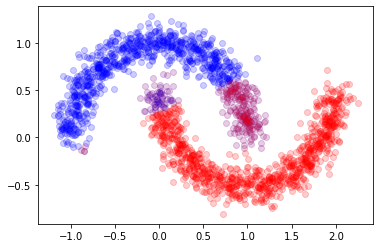

In [14]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

e_net_p, _, _ = get_model(device)
e_net_p = load_checkpoint('model/pseudo-labeling/checkpoint_epoch000000272_f1-0.8749414519906323.pth', e_net_p)

e_net_p.eval()
y_pred = e_net_p(torch.tensor(X).to(device).float())
y_pred_np = y_pred.detach().numpy() > 0.5
y_pred_np = y_pred_np.reshape(-1)

tn, fp, fn, tp = confusion_matrix(y, y_pred_np > 0.5).ravel()
print(f'tp {tp}, fp {fp}, tn {tn}, fn {fn}')
plt.scatter(X[y==0,0], X[y==0,1], color='blue', alpha=0.1)
plt.scatter(X[y==1,0], X[y==1,1], color='red', alpha=0.1)

plt.scatter(X[y_pred_np==0,0], X[y_pred_np==0,1], color='blue', alpha=0.1)
plt.scatter(X[y_pred_np==1,0], X[y_pred_np==1,1], color='red', alpha=0.1)